In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machinehack-ml-merchandise-popularity-prediction/MPP_Dataset/sample_submission.csv
/kaggle/input/machinehack-ml-merchandise-popularity-prediction/MPP_Dataset/Train.csv
/kaggle/input/machinehack-ml-merchandise-popularity-prediction/MPP_Dataset/Test.csv


In [22]:
import seaborn as sns

import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/kaggle/input/machinehack-ml-merchandise-popularity-prediction/MPP_Dataset/Train.csv')
test = pd.read_csv('/kaggle/input/machinehack-ml-merchandise-popularity-prediction/MPP_Dataset/Test.csv')

In [3]:
train.head()

Store_Ratio  Basket_Ratio  Category_1  Store_Score  Category_2  \
0        0.407       0.00380           2      -35.865           1   
1        0.234       0.10500           0      -19.884           1   
2        0.668       0.72600           9       -7.512           1   
3        0.184       0.00561           4      -34.357           1   
4        0.231       0.13100           6      -22.842           1   

   Store_Presence  Score_1  Score_2  Score_3  Score_4    time  popularity  
0          0.9920    0.944   0.0988   0.1100  113.911  189125           4  
1          0.9440    0.900   0.1290   0.0382   76.332  186513           4  
2          0.0387    0.000   0.1340   0.4530  124.075  172143           4  
3          0.8490    0.931   0.1110   0.0641   79.037  184000           5  
4          0.9370    0.000   0.1090   0.0677  109.560  186507           3

In [4]:
test.head()

Store_Ratio  Basket_Ratio  Category_1  Store_Score  Category_2  \
0        0.164         0.994           1      -23.718           0   
1        0.586         0.636           4       -7.710           1   
2        0.457         0.743           0       -7.591           1   
3        0.423         0.748           5       -9.832           1   
4        0.802         0.756           2      -10.791           0   

   Store_Presence  Score_1  Score_2  Score_3  Score_4    time  
0         0.12400  0.99100   0.7890  0.00001  127.602  236436  
1         0.00208  0.32200   0.1070  0.35500  136.337  253631  
2         0.40400  0.00931   0.2010  0.68800  154.902  215669  
3         0.03000  0.22100   0.1690  0.42800   93.977  325200  
4         0.08430  0.00765   0.0521  0.96300  131.715  288293

In [6]:
print("the shape of train dataset =",train.shape)
print("the shape of test dataset =",test.shape)

the shape of train dataset = (18208, 12)
the shape of test dataset = (12140, 11)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     12140 non-null  float64
 1   Basket_Ratio    12140 non-null  float64
 2   Category_1      12140 non-null  int64  
 3   Store_Score     12140 non-null  float64
 4   Category_2      12140 non-null  int64  
 5   Store_Presence  12140 non-null  float64
 6   Score_1         12140 non-null  float64
 7   Score_2         12140 non-null  float64
 8   Score_3         12140 non-null  float64
 9   Score_4         12140 non-null  float64
 10  time            12140 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.0 MB


In [9]:
train.describe()

Store_Ratio  Basket_Ratio    Category_1   Store_Score    Category_2  \
count  18208.000000  18208.000000  18208.000000  18208.000000  18208.000000   
mean       0.544283      0.483585      5.155536    -12.198086      0.648506   
std        0.202709      0.302010      3.535068      8.370566      0.477450   
min        0.000000      0.000216      0.000000    -47.576000      0.000000   
25%        0.411000      0.200000      2.000000    -16.496250      0.000000   
50%        0.573000      0.517000      5.000000     -9.166500      1.000000   
75%        0.699000      0.742000      8.000000     -5.943750      1.000000   
max        0.998000      1.000000     11.000000     -0.079000      1.000000   

       Store_Presence       Score_1       Score_2       Score_3       Score_4  \
count    18208.000000  18208.000000  18208.000000  18208.000000  18208.000000   
mean         0.477702      0.322109      0.164888      0.421440    115.305776   
std          0.380634      0.413493      0.136531      0.271922     31.478303   
min          0.000000      0.000000      0.011900      0.000000      0.000000   
25%          0.086175      0.000001      0.095300      0.184750     90.974250   
50%          0.430000      0.002245      0.112000      0.393000    114.022500   
75%          0.895000      0.859000      0.176000      0.640000    134.997000   
max          0.996000      1.000000      0.991000      0.999000    219.701000   

               time    popularity  
count  1.820800e+04  18208.000000  
mean   2.180101e+05      3.850231  
std    9.648289e+04      0.544226  
min    3.184400e+04      0.000000  
25%    1.696202e+05      4.000000  
50%    2.046460e+05      4.000000  
75%    2.471562e+05      4.000000  
max    3.908467e+06      5.000000

In [10]:
test.describe()

Store_Ratio  Basket_Ratio    Category_1   Store_Score    Category_2  \
count  12140.000000  12140.000000  12140.000000  12140.000000  12140.000000   
mean       0.543776      0.488879      5.121417    -12.062847      0.642916   
std        0.200109      0.301217      3.528765      8.300385      0.479160   
min        0.000000      0.000000      0.000000    -46.847000      0.000000   
25%        0.414750      0.213000      2.000000    -16.066000      0.000000   
50%        0.570000      0.521000      5.000000     -9.046500      1.000000   
75%        0.696000      0.745000      8.000000     -5.891750      1.000000   
max        0.978000      1.000000     11.000000      0.662000      1.000000   

       Store_Presence       Score_1       Score_2       Score_3       Score_4  \
count    12140.000000  12140.000000  12140.000000  12140.000000  12140.000000   
mean         0.474675      0.321641      0.165942      0.420485    115.748041   
std          0.377582      0.414438      0.139109      0.270508     31.519999   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.087775      0.000001      0.095900      0.190000     90.908750   
50%          0.430500      0.002050      0.112000      0.392000    114.618500   
75%          0.882000      0.861000      0.173250      0.633000    135.829250   
max          0.996000      1.000000      0.994000      1.000000    219.701000   

               time  
count  1.214000e+04  
mean   2.154031e+05  
std    8.231108e+04  
min    3.406700e+04  
25%    1.700000e+05  
50%    2.043415e+05  
75%    2.445222e+05  
max    1.782178e+06

In [11]:
# null values in train
train.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

In [12]:
test.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
dtype: int64

In [13]:
# duplicated values:
print('No.of duplicated values in train',train.duplicated().sum())

print('No.of duplicated values in test',test.duplicated().sum())

No.of duplicated values in train 2923
No.of duplicated values in test 1444


In [14]:
# droping the duplicated values:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [15]:
# no of unique values in train dataset
train.nunique()

Store_Ratio        1053
Basket_Ratio       1993
Category_1           12
Store_Score       10758
Category_2            2
Store_Presence     2832
Score_1            3668
Score_2            1385
Score_3            1591
Score_4           12943
time              12755
popularity            5
dtype: int64

In [17]:
# no of unique values in test dataset
test.nunique()

Store_Ratio       1010
Basket_Ratio      1811
Category_1          12
Store_Score       8300
Category_2           2
Store_Presence    2507
Score_1           3064
Score_2           1275
Score_3           1491
Score_4           9463
time              9301
dtype: int64

In [16]:
for i in train.columns:
    print('%s'%i,train[i].value_counts())

Store_Ratio 0.6090    44
0.7030    43
0.6980    42
0.5400    41
0.6560    41
          ..
0.0902     1
0.0710     1
0.0939     1
0.0613     1
0.0605     1
Name: Store_Ratio, Length: 1053, dtype: int64
Basket_Ratio 0.78300    33
0.71600    31
0.72900    30
0.72600    29
1.00000    28
           ..
0.08680     1
0.00549     1
0.09340     1
0.00155     1
0.05960     1
Name: Basket_Ratio, Length: 1993, dtype: int64
Category_1 0     1921
7     1713
2     1627
9     1418
1     1387
5     1359
4     1141
11    1096
8     1008
6      989
10     978
3      648
Name: Category_1, dtype: int64
Store_Score -4.271     8
-7.509     7
-7.666     7
-8.015     7
-5.597     6
          ..
-12.667    1
-8.228     1
-19.086    1
-11.122    1
-10.284    1
Name: Store_Score, Length: 10758, dtype: int64
Category_2 1    9877
0    5408
Name: Category_2, dtype: int64
Store_Presence 0.99500    296
0.99400    201
0.99600    160
0.99300    147
0.99200    122
          ... 
0.00259      1
0.00327      1
0.00533     

In [25]:
train.corr()

Store_Ratio  Basket_Ratio  Category_1  Store_Score  \
Store_Ratio        1.000000      0.453653    0.042702     0.579793   
Basket_Ratio       0.453653      1.000000    0.048168     0.821896   
Category_1         0.042702      0.048168    1.000000     0.041479   
Store_Score        0.579793      0.821896    0.041479     1.000000   
Category_2        -0.096637     -0.108873   -0.148276    -0.081731   
Store_Presence    -0.450610     -0.811553   -0.046148    -0.707084   
Score_1           -0.429869     -0.583105   -0.032720    -0.703222   
Score_2           -0.042446      0.257677    0.017054     0.136806   
Score_3            0.615432      0.519984    0.039376     0.508327   
Score_4            0.107917      0.255437    0.002141     0.261071   
time              -0.075877      0.077245   -0.008862     0.050414   
popularity         0.232360      0.205037    0.003255     0.207316   

                Category_2  Store_Presence   Score_1   Score_2   Score_3  \
Store_Ratio      -0.096637       -0.450610 -0.429869 -0.042446  0.615432   
Basket_Ratio     -0.108873       -0.811553 -0.583105  0.257677  0.519984   
Category_1       -0.148276       -0.046148 -0.032720  0.017054  0.039376   
Store_Score      -0.081731       -0.707084 -0.703222  0.136806  0.508327   
Category_2        1.000000        0.096904  0.012108 -0.034441 -0.040082   
Store_Presence    0.096904        1.000000  0.535580 -0.179129 -0.411032   
Score_1           0.012108        0.535580  1.000000 -0.098179 -0.457041   
Score_2          -0.034441       -0.179129 -0.098179  1.000000  0.035843   
Score_3          -0.040082       -0.411032 -0.457041  0.035843  1.000000   
Score_4          -0.034771       -0.217470 -0.194036  0.018684  0.175598   
time             -0.015498       -0.050624 -0.076290 -0.003450 -0.004532   
popularity       -0.034166       -0.196013 -0.158218 -0.002890  0.177397   

                 Score_4      time  popularity  
Store_Ratio     0.107917 -0.075877    0.232360  
Basket_Ratio    0.255437  0.077245    0.205037  
Category_1      0.002141 -0.008862    0.003255  
Store_Score     0.261071  0.050414    0.207316  
Category_2     -0.034771 -0.015498   -0.034166  
Store_Presence -0.217470 -0.050624   -0.196013  
Score_1        -0.194036 -0.076290   -0.158218  
Score_2         0.018684 -0.003450   -0.002890  
Score_3         0.175598 -0.004532    0.177397  
Score_4         1.000000  0.022467    0.045690  
time            0.022467  1.000000    0.018695  
popularity      0.045690  0.018695    1.000000

<AxesSubplot:>

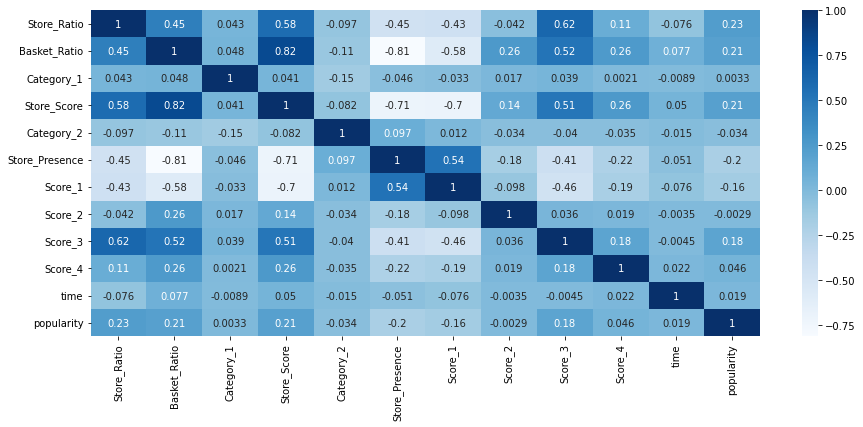

In [29]:
plt.figure(figsize=(15,6))
sns.heatmap(train.corr(),annot = True,cmap= 'Blues')

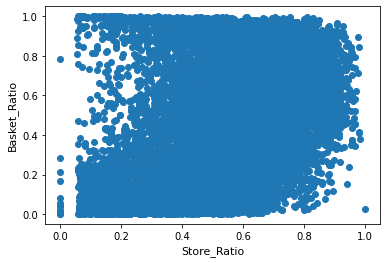

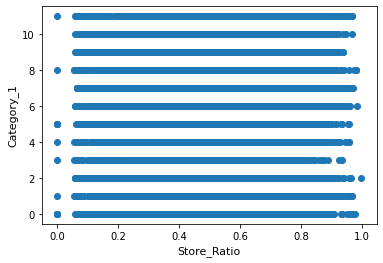

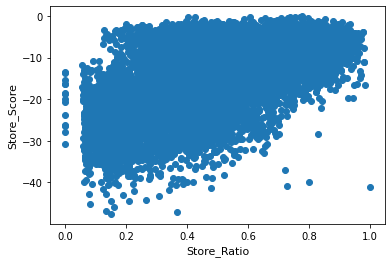

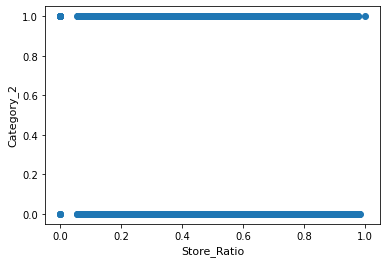

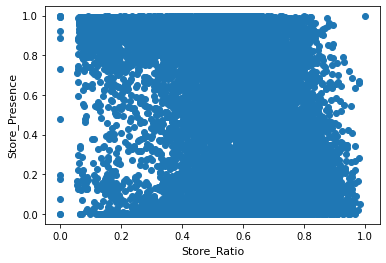

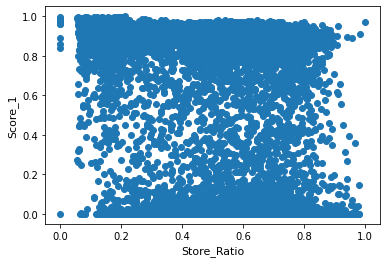

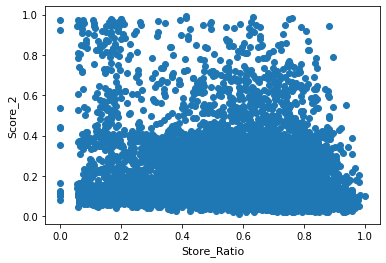

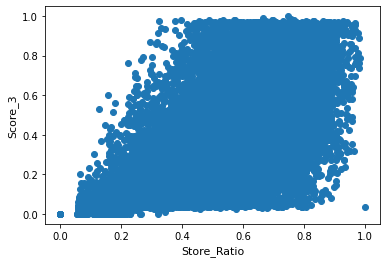

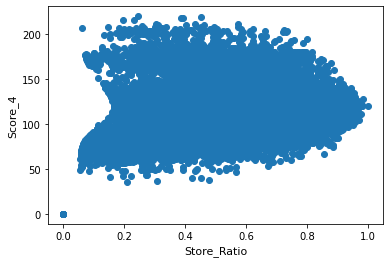

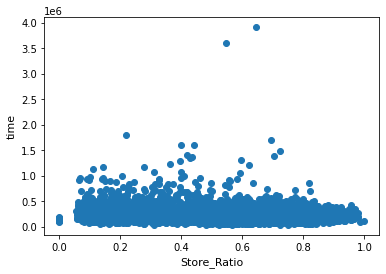

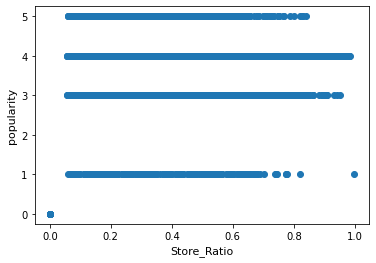

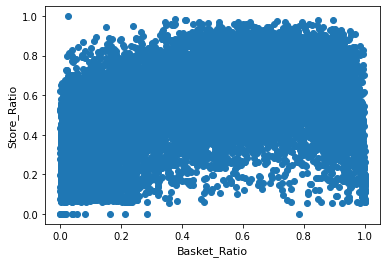

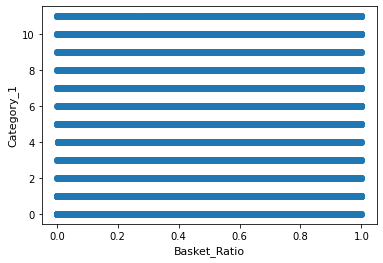

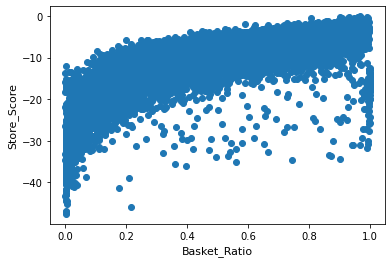

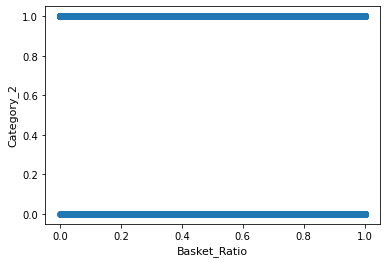

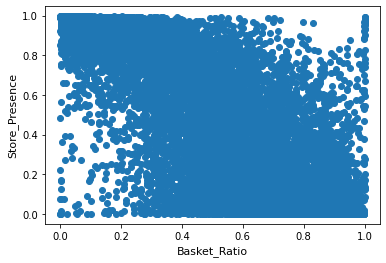

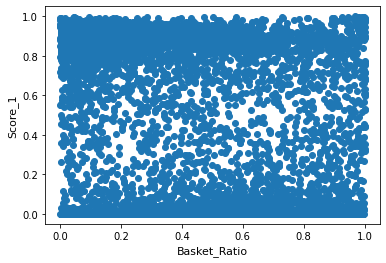

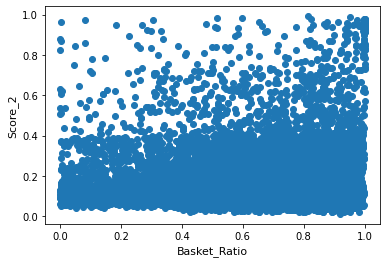

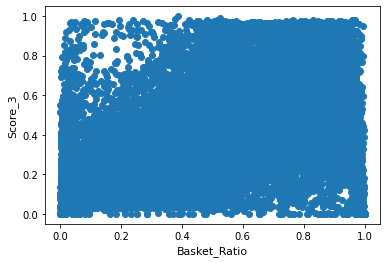

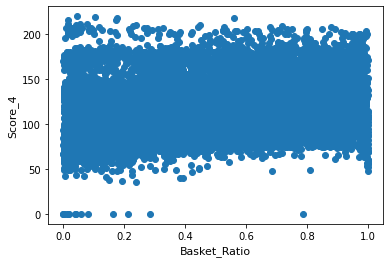

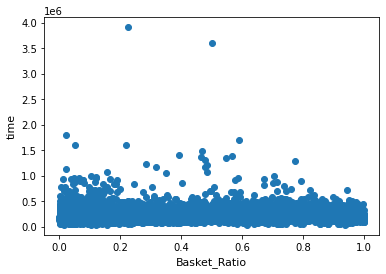

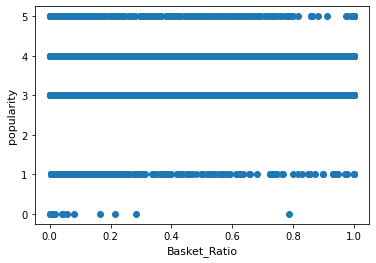

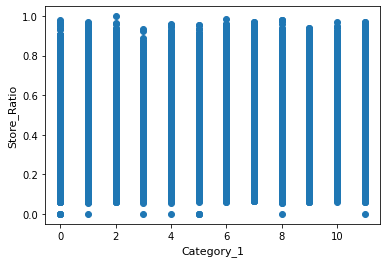

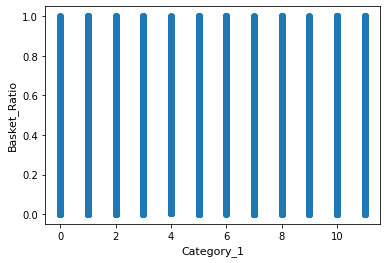

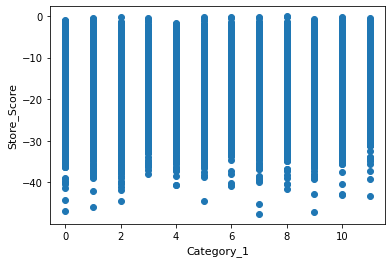

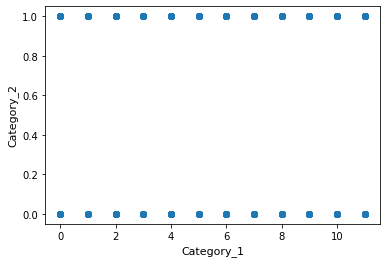

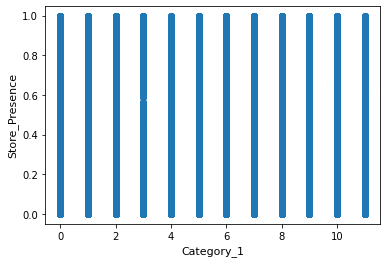

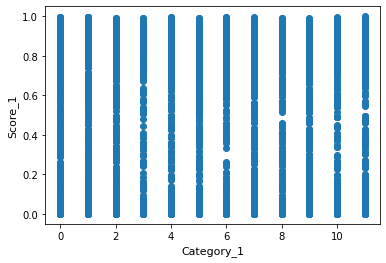

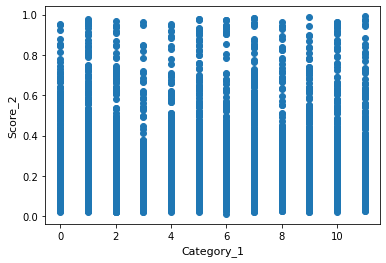

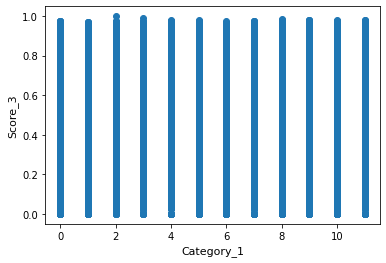

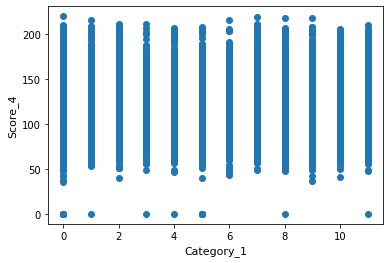

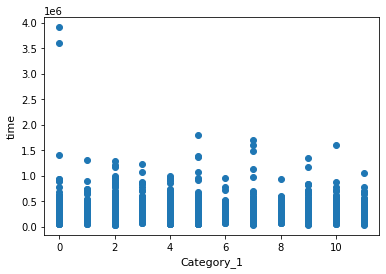

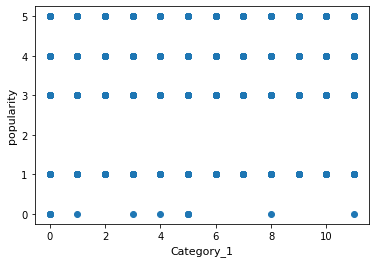

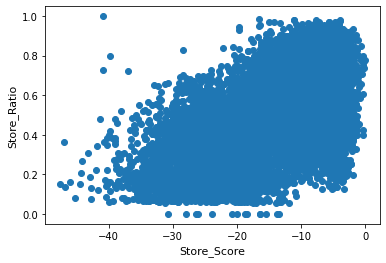

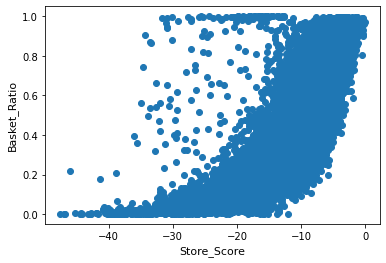

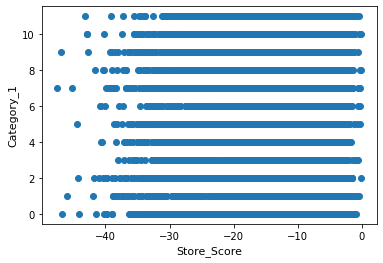

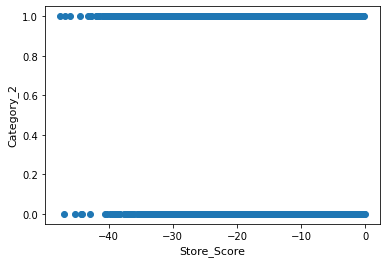

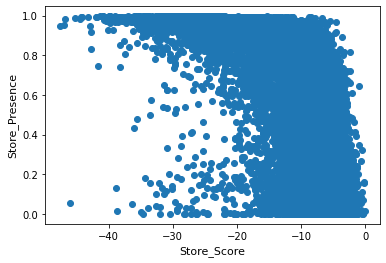

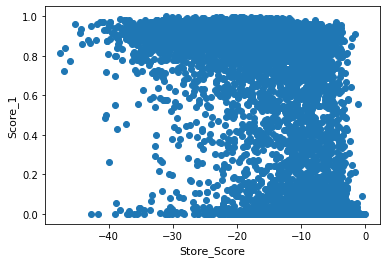

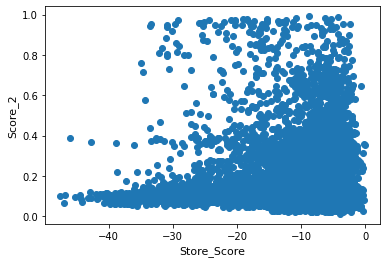

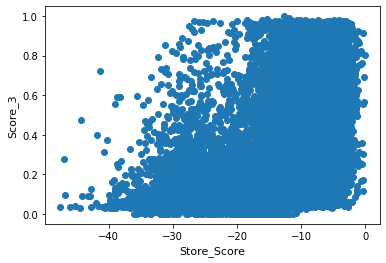

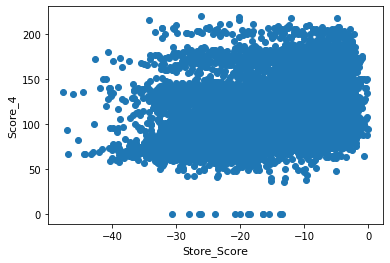

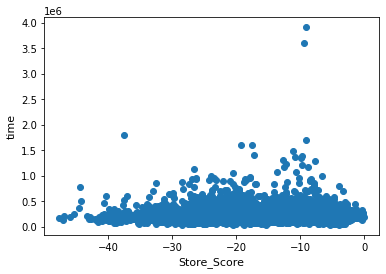

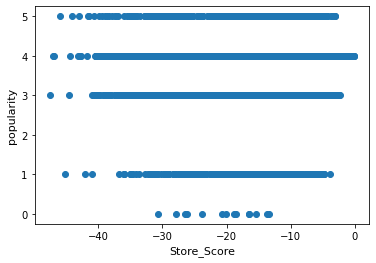

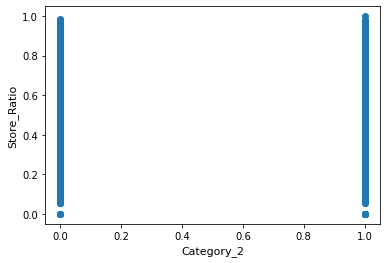

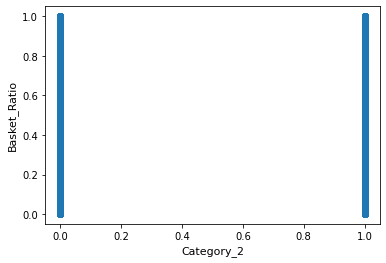

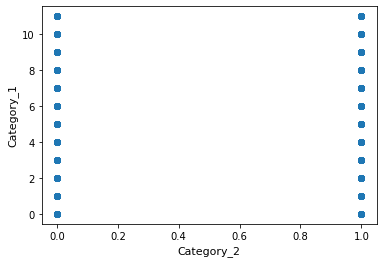

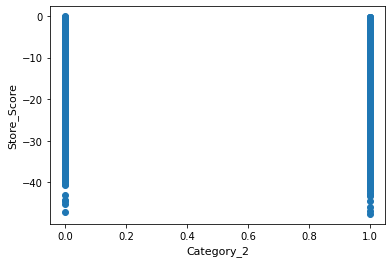

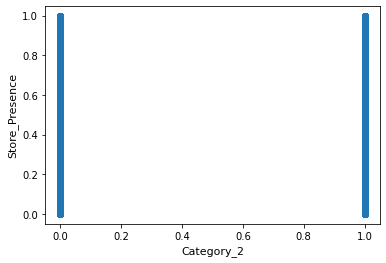

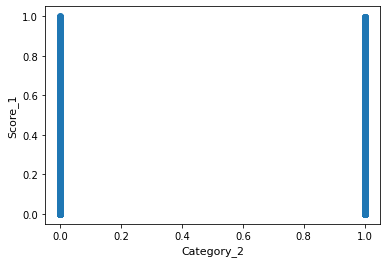

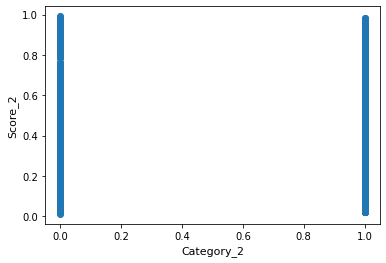

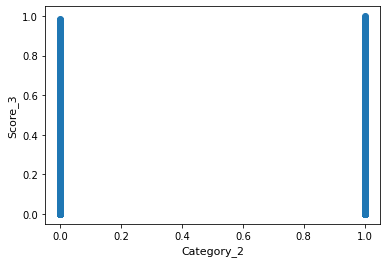

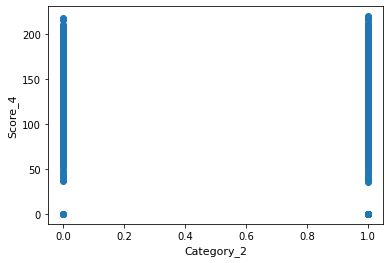

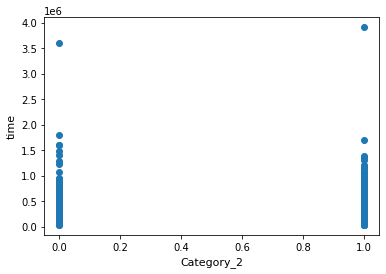

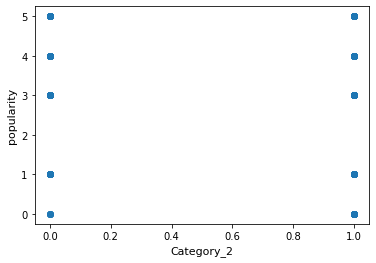

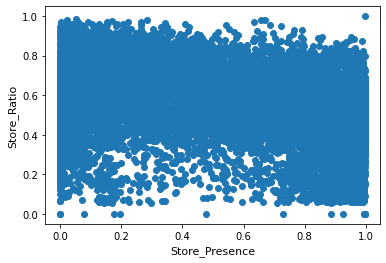

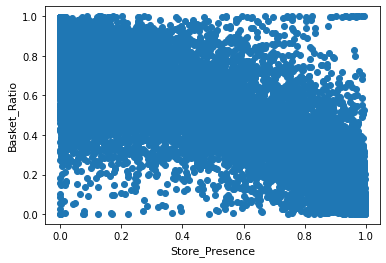

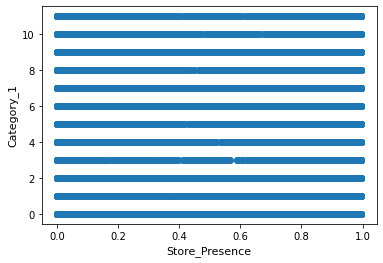

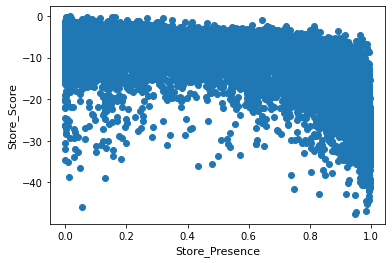

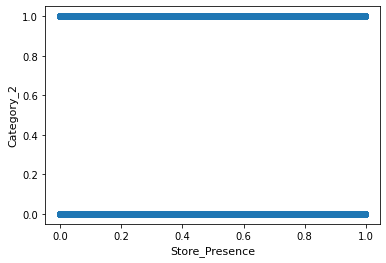

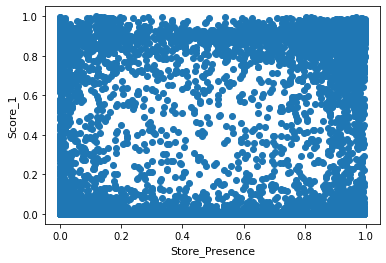

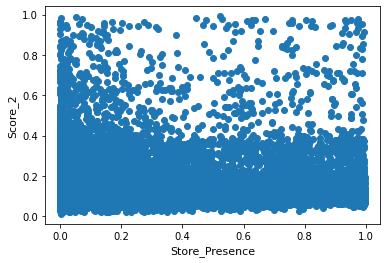

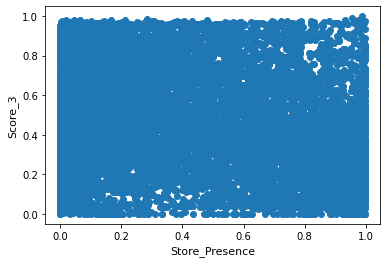

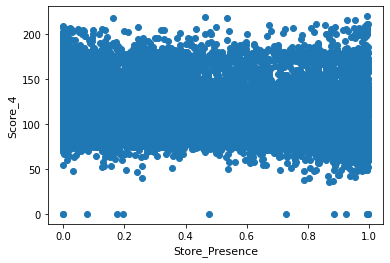

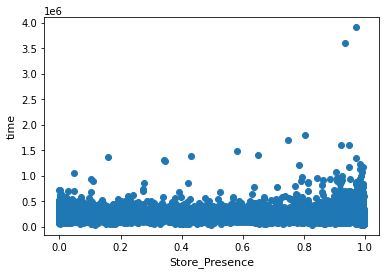

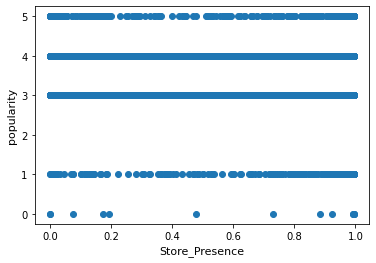

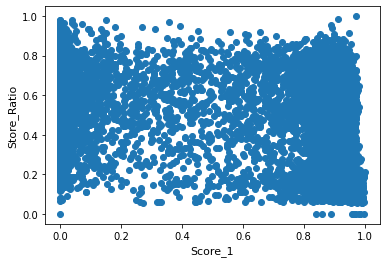

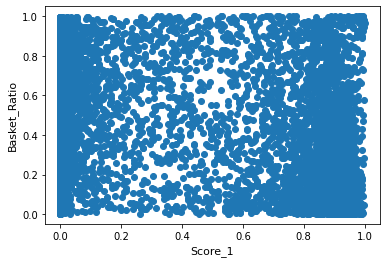

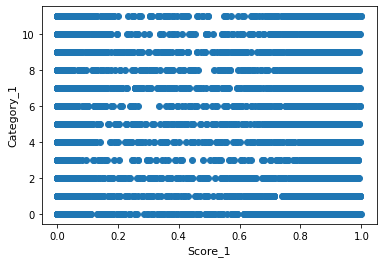

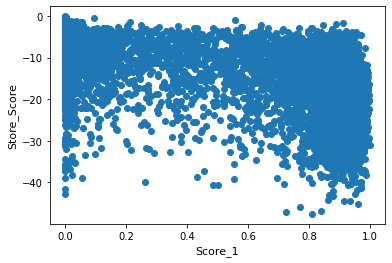

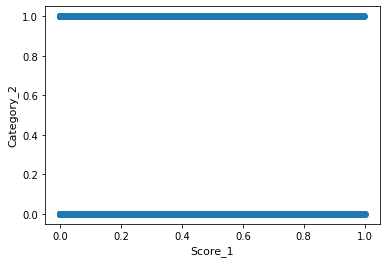

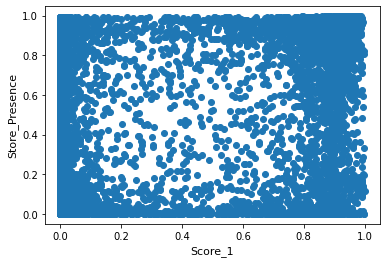

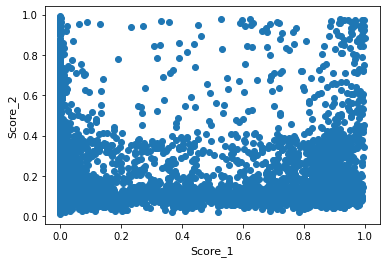

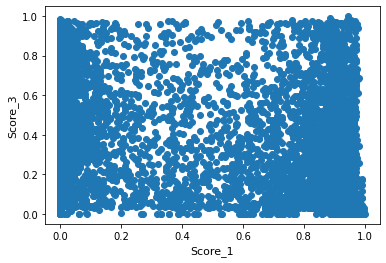

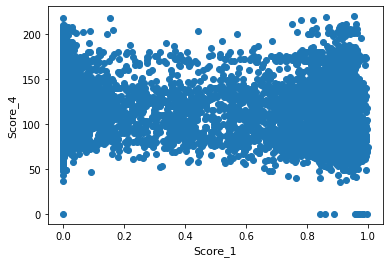

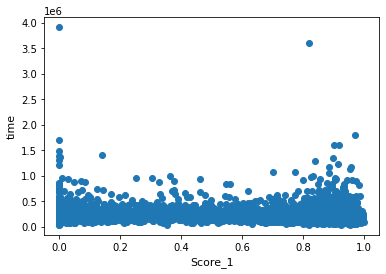

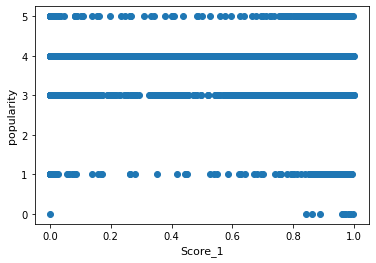

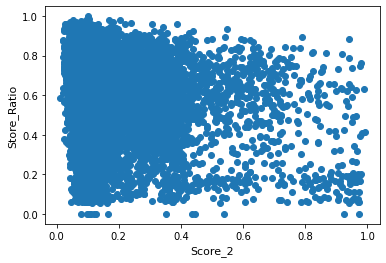

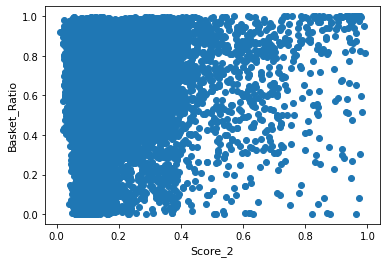

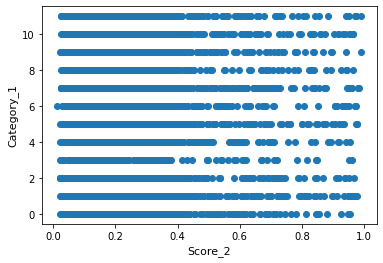

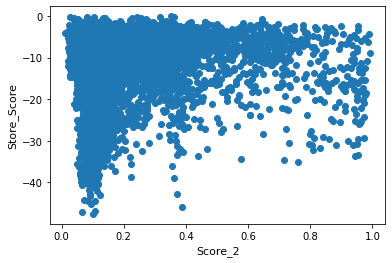

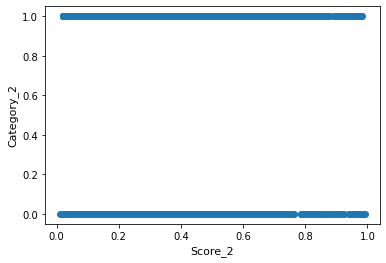

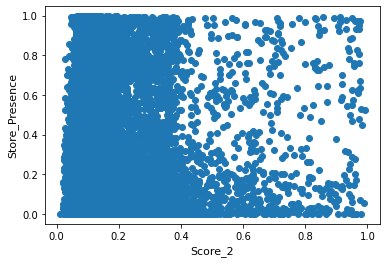

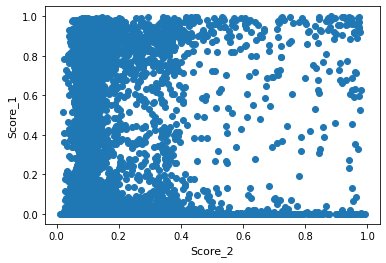

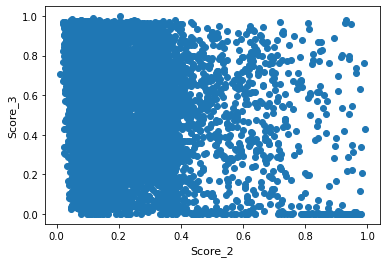

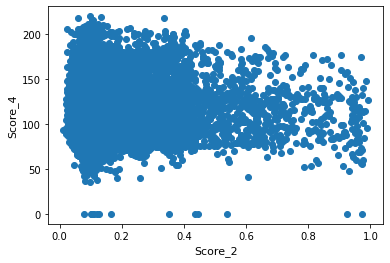

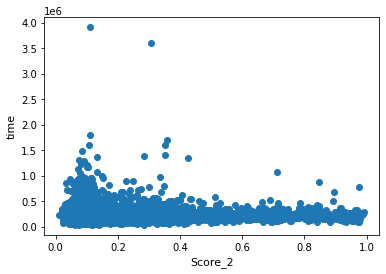

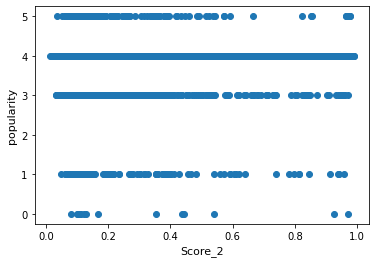

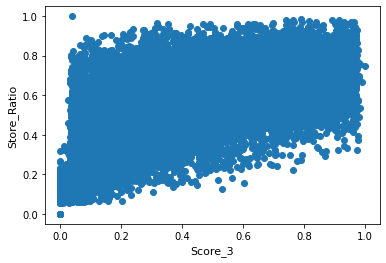

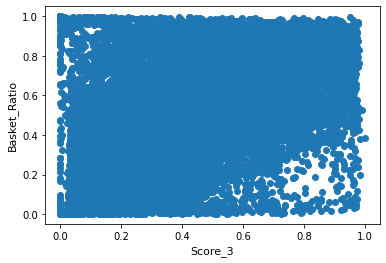

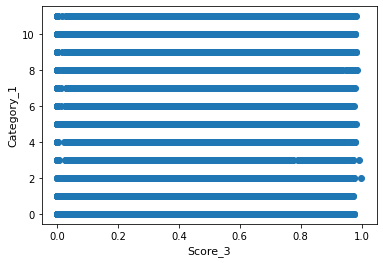

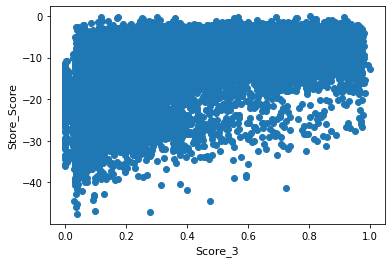

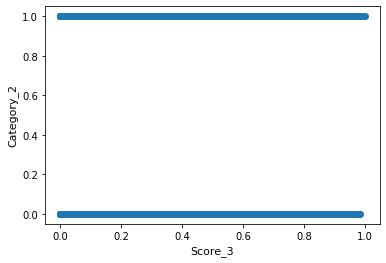

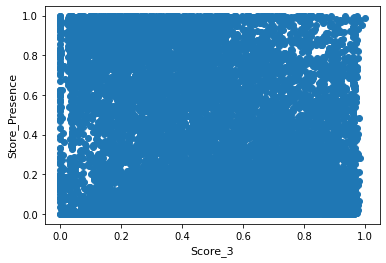

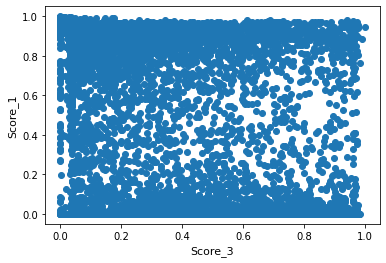

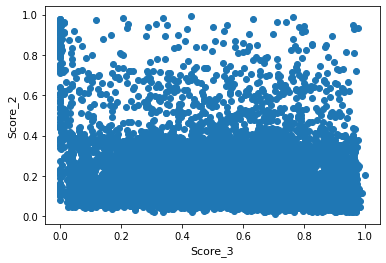

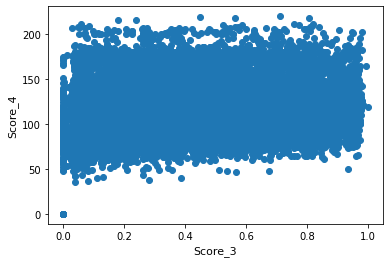

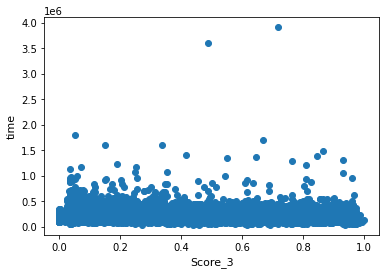

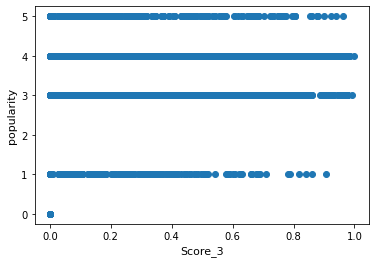

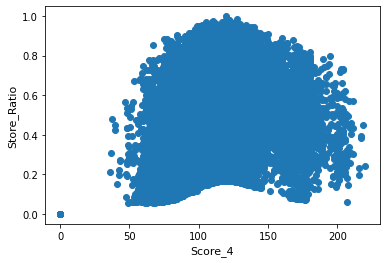

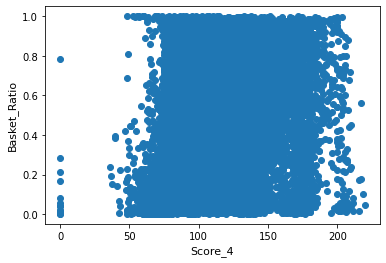

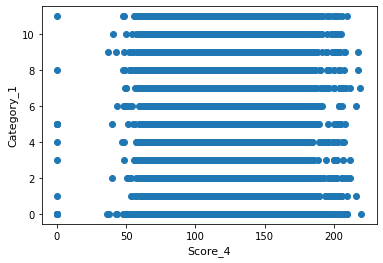

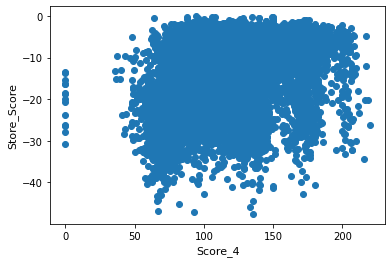

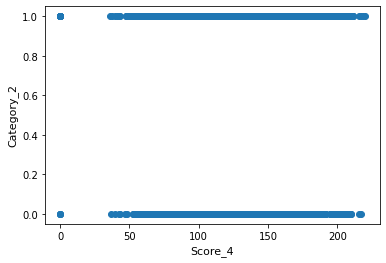

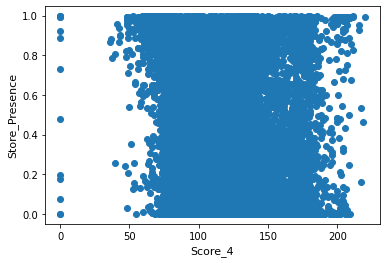

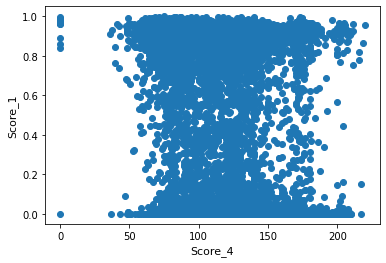

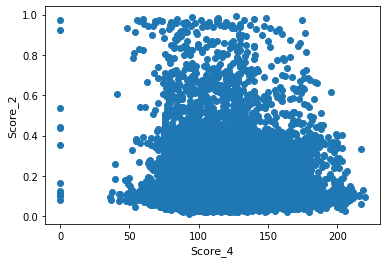

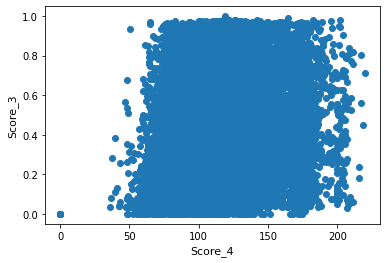

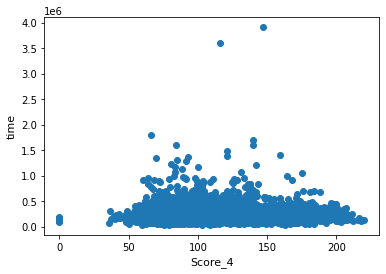

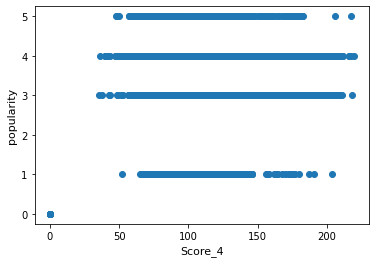

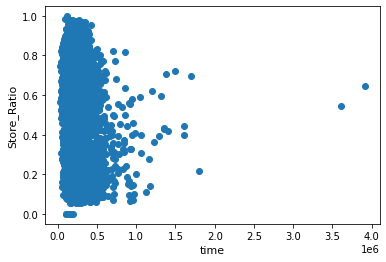

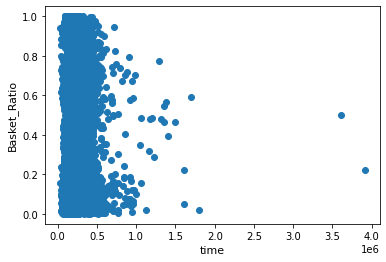

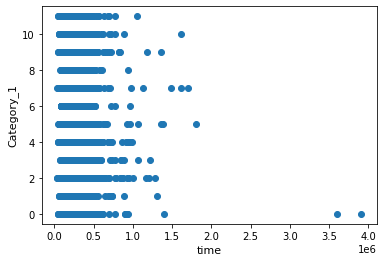

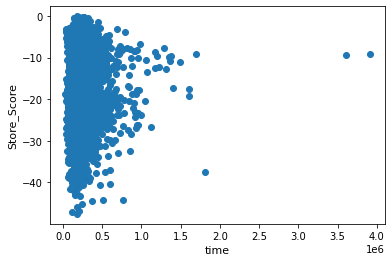

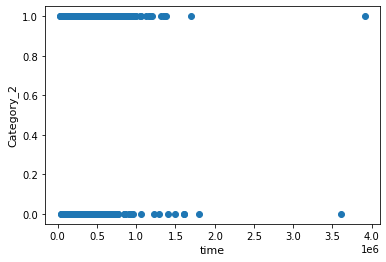

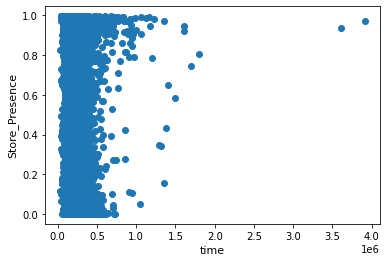

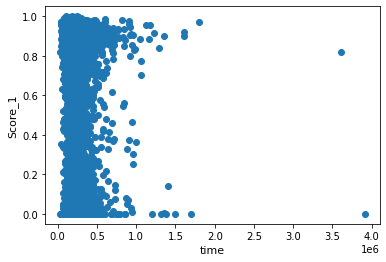

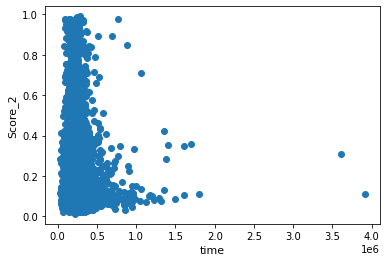

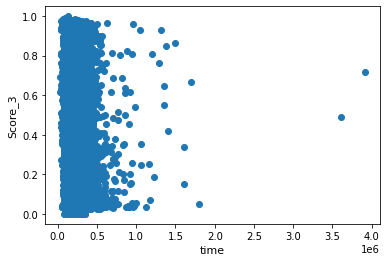

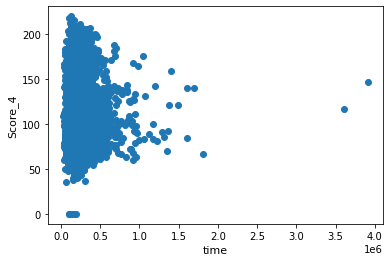

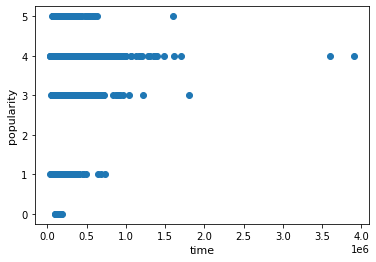

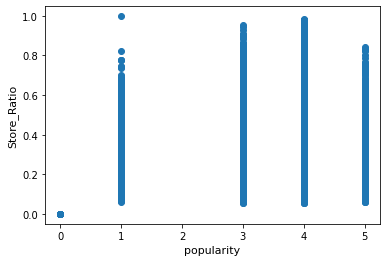

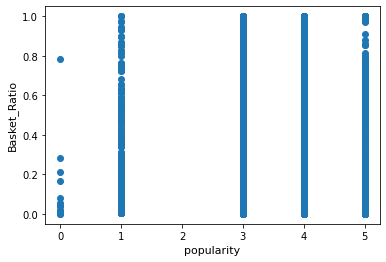

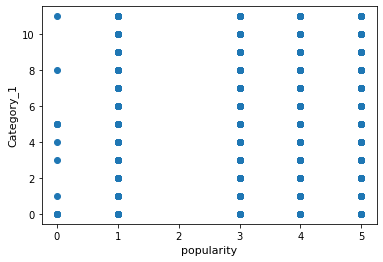

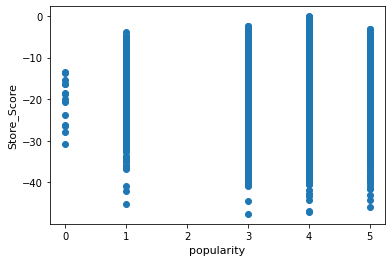

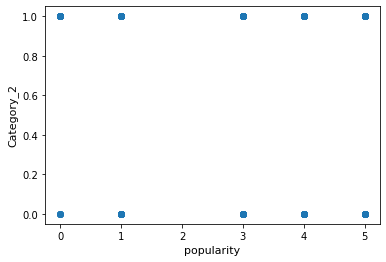

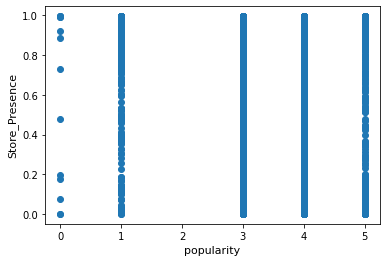

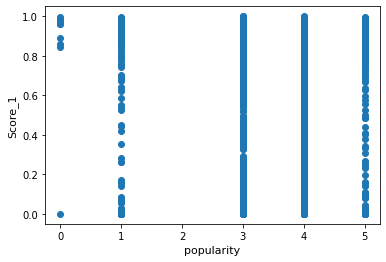

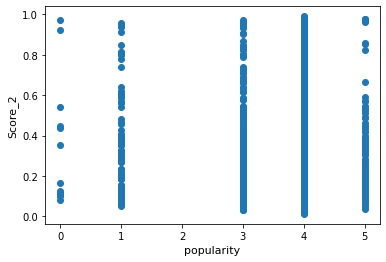

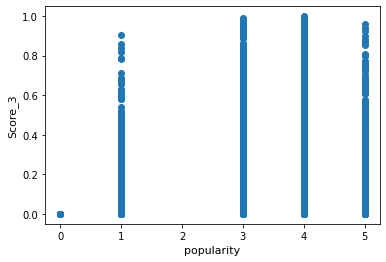

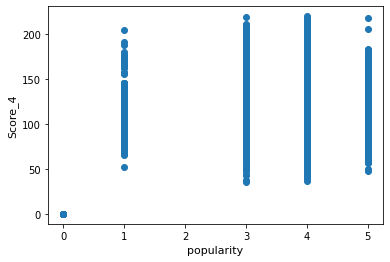

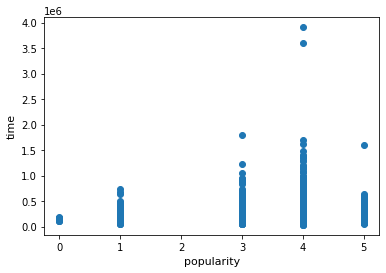

In [35]:
for i in train.columns:
    for j in train.columns:
        if i == j:
            pass
        else:
            plt.scatter(train[i],train[j])
            plt.xlabel(i,fontsize=11)
            plt.ylabel(j,fontsize=11)
            plt.show()
    

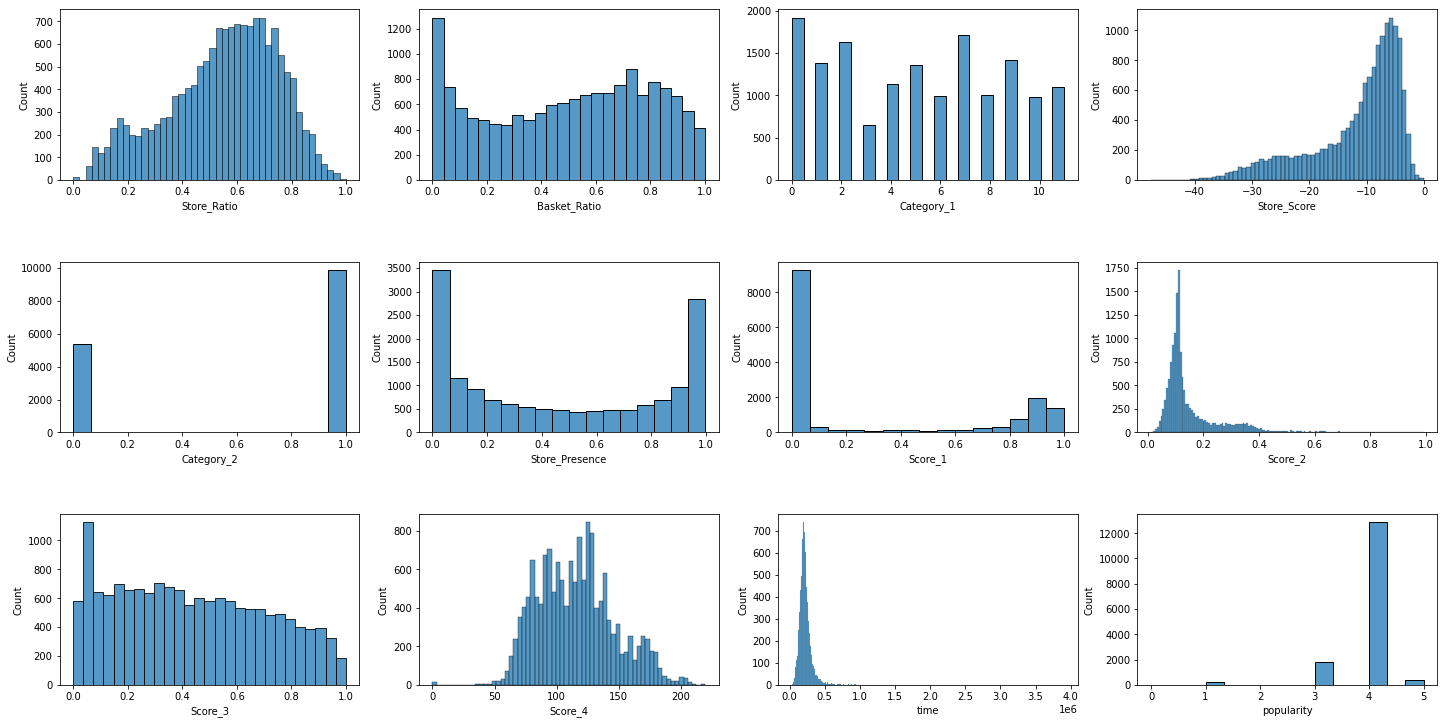

In [39]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in train.items():
        sns.histplot(x=col, data=train, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

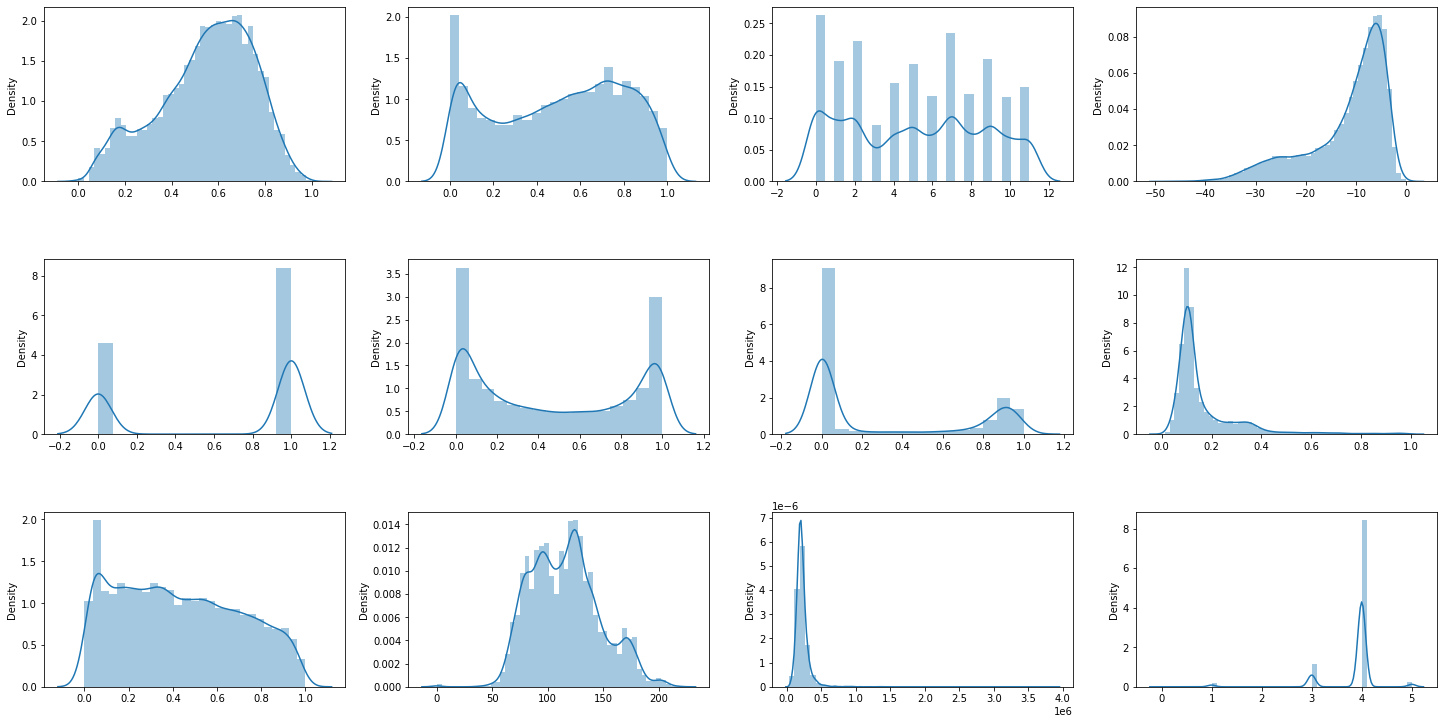

In [49]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in train.items():
        sns.distplot(x=train[col], ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

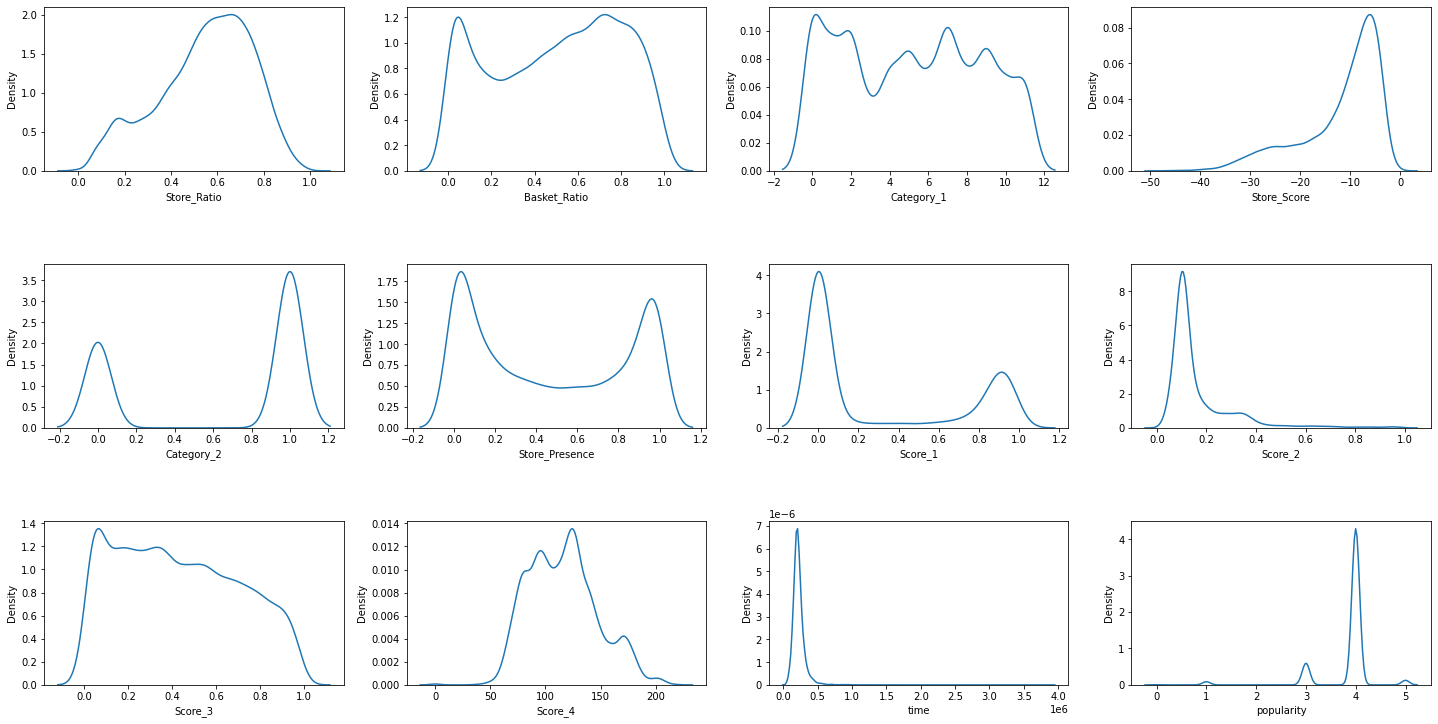

In [40]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in train.items():
        sns.kdeplot(x=col, data=train, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

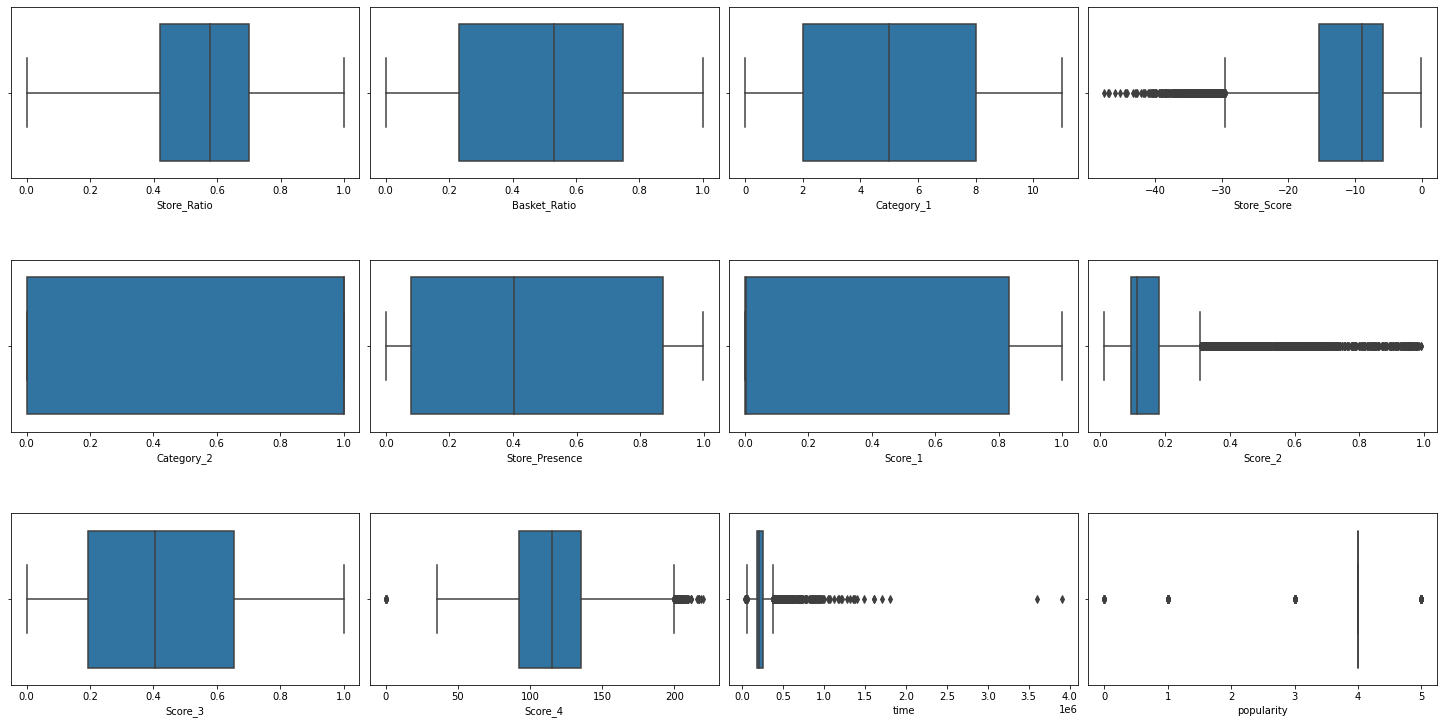

In [41]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in train.items():
        sns.boxplot(x=col, data=train, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

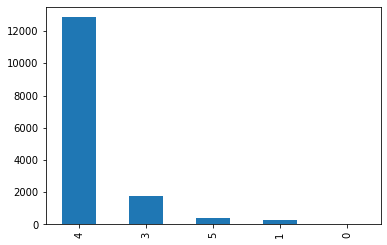

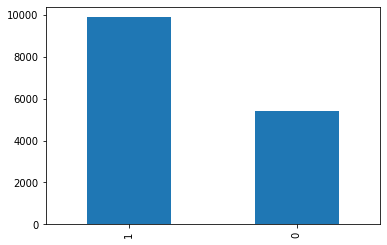

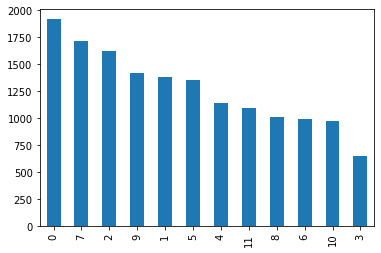

In [45]:
a = ['popularity','Category_2','Category_1']
for i in a:
    train[i].value_counts().plot(kind ='bar')
    plt.show()

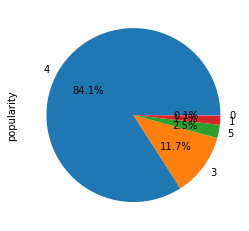

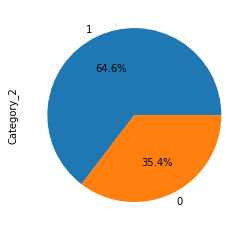

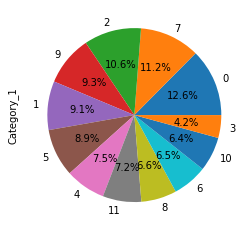

In [46]:
a = ['popularity','Category_2','Category_1']
for i in a:
    train[i].value_counts().plot(kind ='pie',autopct ='%1.1f%%')
    plt.show()

# Dendrogram

In [50]:
import scipy
from scipy import stats
from scipy.cluster import hierarchy

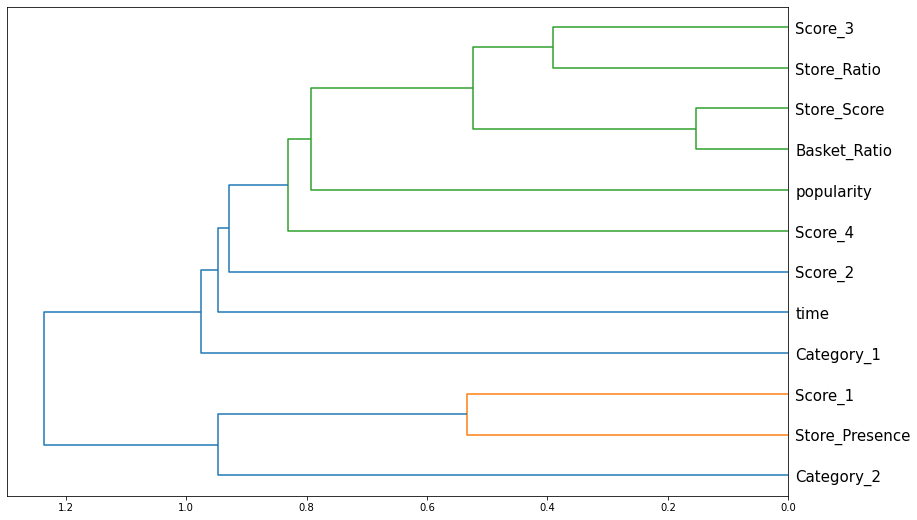

In [51]:
corr = np.round(scipy.stats.spearmanr(train).correlation,4)
corr_condensed = hierarchy.distance.squareform(1-corr) # non -ve val and compresed

plt.figure(figsize=(14,9))
hierarchy.dendrogram(hierarchy.linkage(corr_condensed,method='average'),
                     labels=train.columns,orientation='left',leaf_font_size=15)
plt.show()

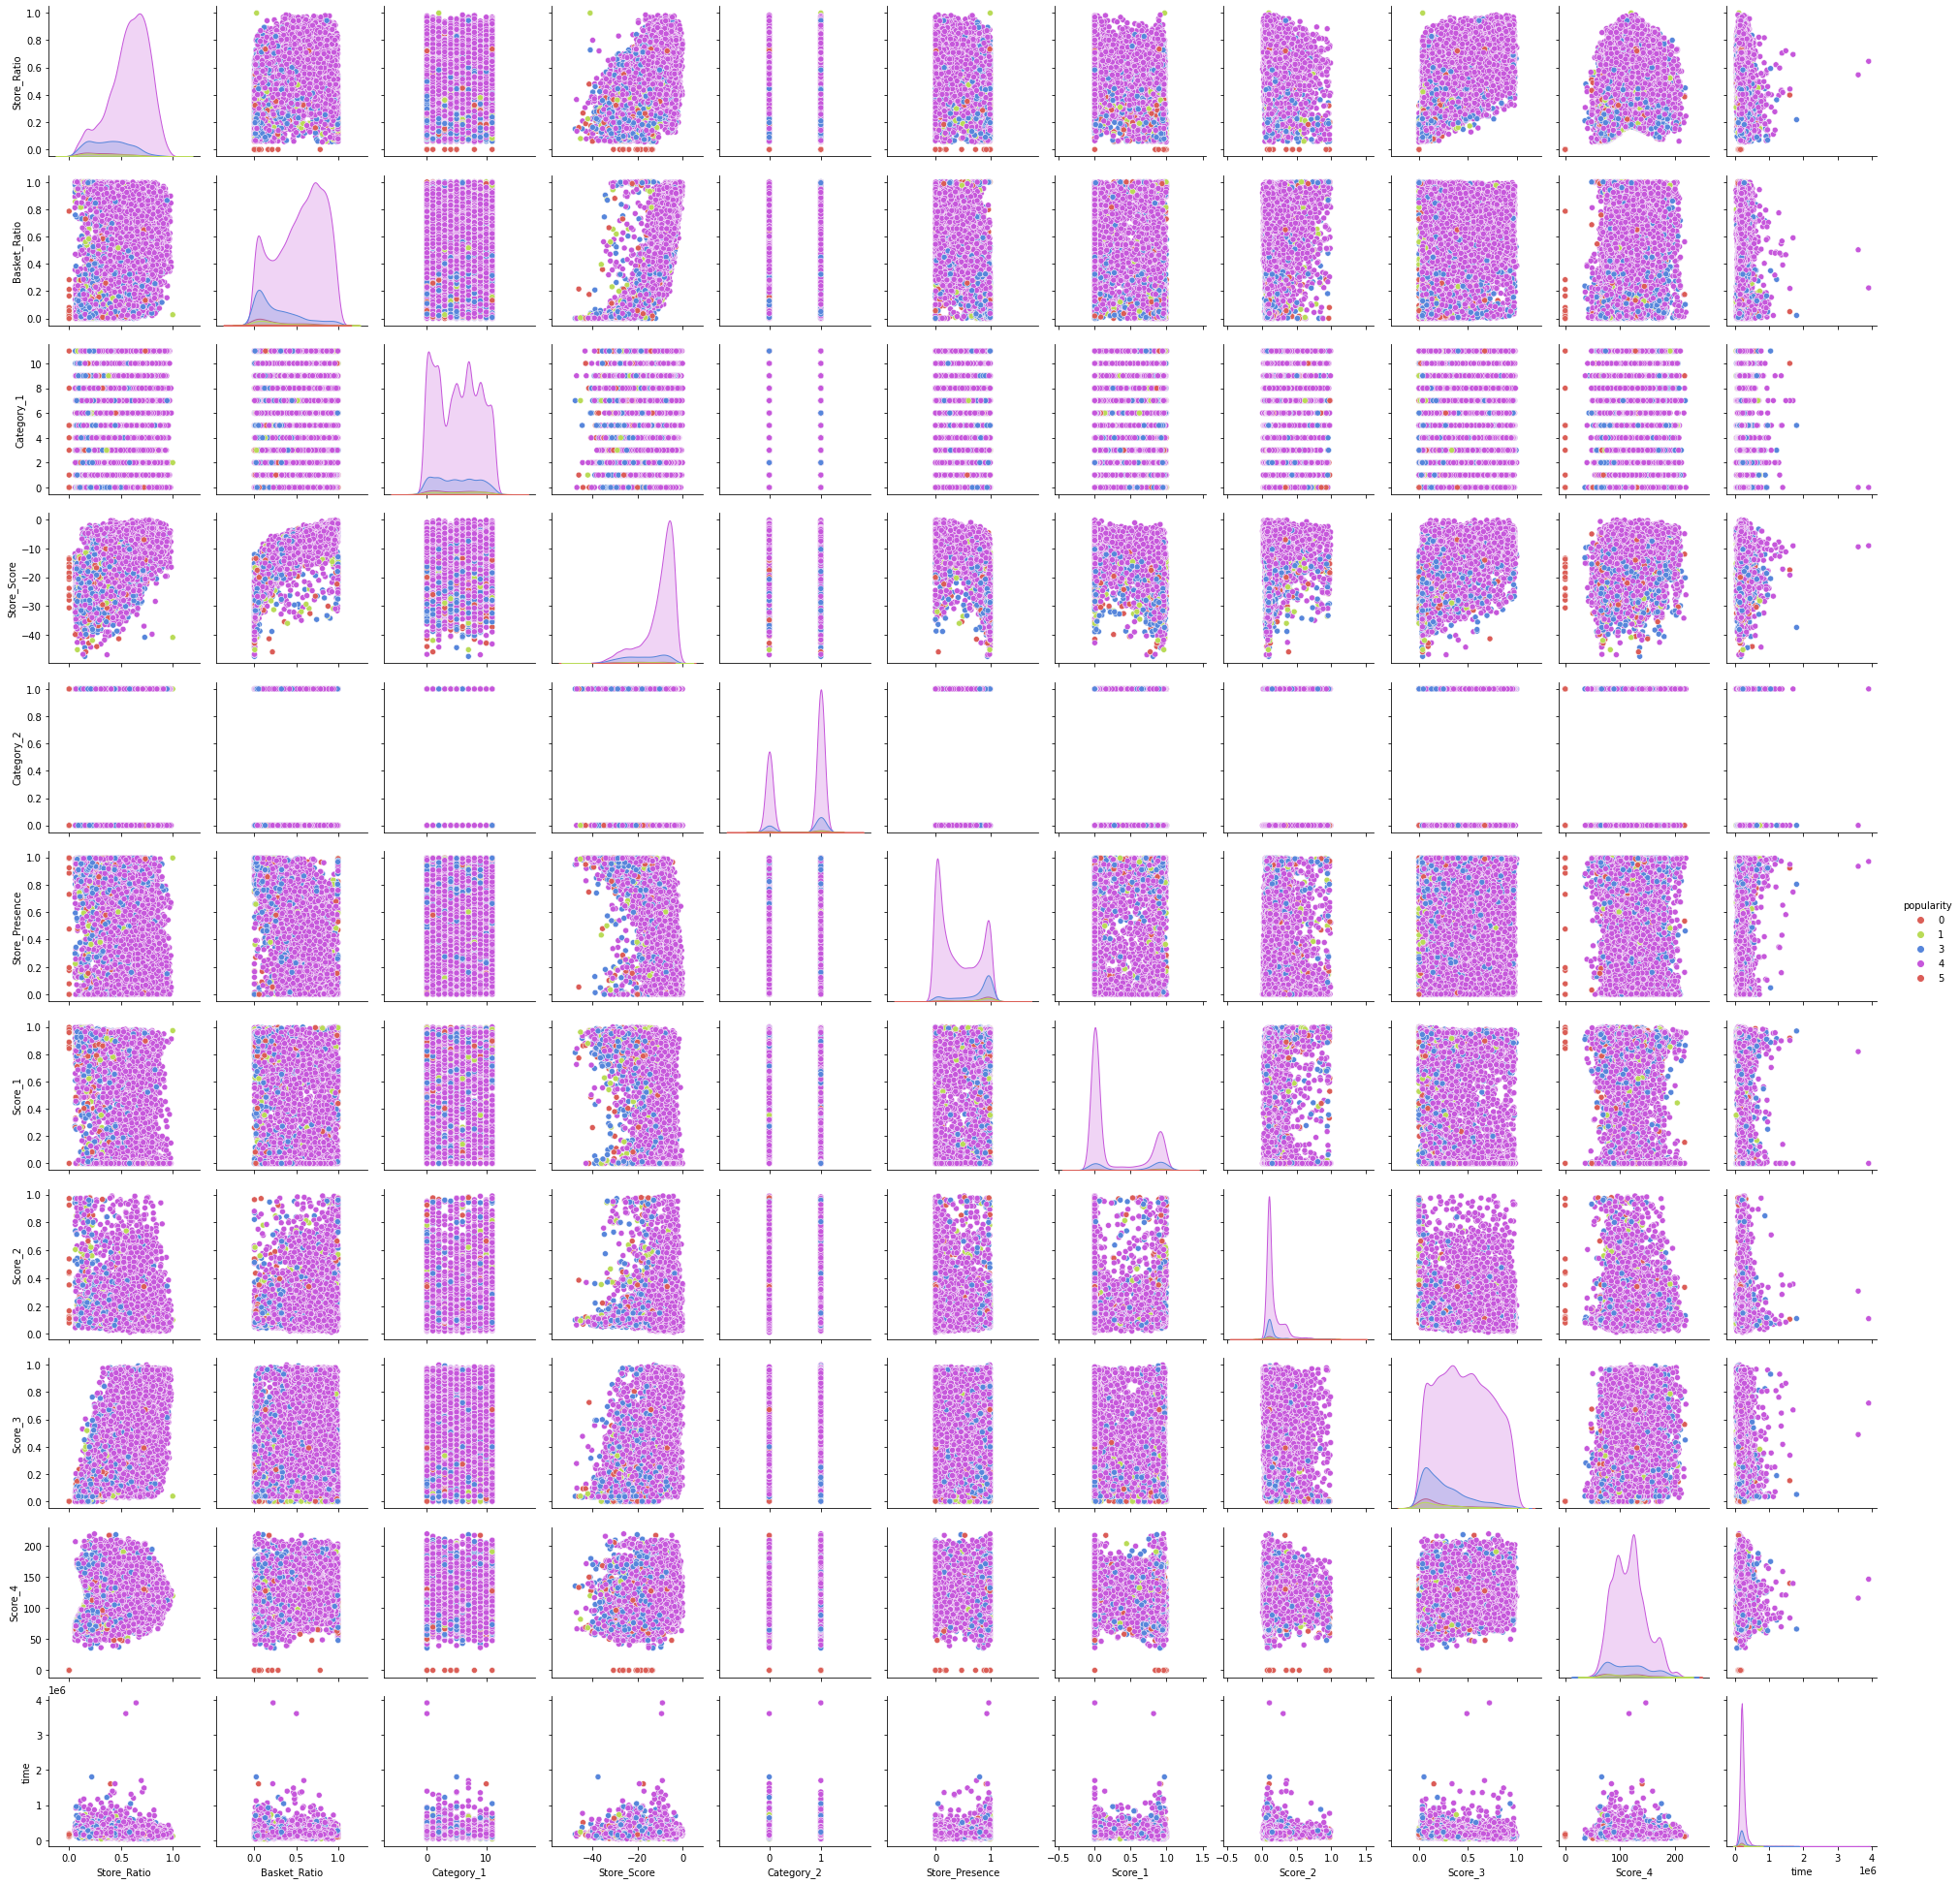

In [52]:
sns.pairplot(data = train, hue ='popularity', palette='hls')

# preprocessing :


In [55]:
#convert the time column into more columns like hour, month, day, year , minute
train['hour'] = pd.to_datetime(train['time'].astype(int),unit = 's').dt.hour
train['month'] = pd.to_datetime(train['time'].astype(int),unit = 's').dt.month

train['day'] = pd.to_datetime(train['time'].astype(int),unit = 's').dt.day

train['year'] = pd.to_datetime(train['time'].astype(int),unit = 's').dt.year

train['minute'] = pd.to_datetime(train['time'].astype(int),unit = 's').dt.minute

In [56]:
train.head()

Store_Ratio  Basket_Ratio  Category_1  Store_Score  Category_2  \
0        0.407       0.00380           2      -35.865           1   
1        0.234       0.10500           0      -19.884           1   
2        0.668       0.72600           9       -7.512           1   
3        0.184       0.00561           4      -34.357           1   
4        0.231       0.13100           6      -22.842           1   

   Store_Presence  Score_1  Score_2  Score_3  Score_4    time  popularity  \
0          0.9920    0.944   0.0988   0.1100  113.911  189125           4   
1          0.9440    0.900   0.1290   0.0382   76.332  186513           4   
2          0.0387    0.000   0.1340   0.4530  124.075  172143           4   
3          0.8490    0.931   0.1110   0.0641   79.037  184000           5   
4          0.9370    0.000   0.1090   0.0677  109.560  186507           3   

   hour  month  day  year  minute  
0     4      1    3  1970      32  
1     3      1    3  1970      48  
2    23      1    2  1970      49  
3     3      1    3  1970       6  
4     3      1    3  1970      48

In [57]:
X = train.drop(columns =['time','popularity'])
y = train['popularity']

# Scalling

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
def min_max_scaling(data,col_to_scale):
    from numpy import asarray
    from sklearn.preprocessing import MinMaxScaler
    
    scaler = MinMaxScaler()
    data[col_to_scale] = scaler.fit_transform(data[col_to_scale])
    return data

In [63]:
col_to_scale = ['Store_Ratio','Basket_Ratio','Category_1','Store_Score','Category_2','Store_Presence','Score_1','Score_2','Score_3','Score_4']

# passing data and column name for scaling
X = min_max_scaling(X,col_to_scale)

In [65]:
X.head()

Store_Ratio  Basket_Ratio  Category_1  Store_Score  Category_2  \
0     0.407816      0.003585    0.181818     0.246563         1.0   
1     0.234469      0.104807    0.000000     0.583026         1.0   
2     0.669339      0.725941    0.818182     0.843506         1.0   
3     0.184369      0.005395    0.363636     0.278312         1.0   
4     0.231463      0.130812    0.545455     0.520749         1.0   

   Store_Presence  Score_1   Score_2   Score_3   Score_4  hour  month  day  \
0        0.995984    0.944  0.088755  0.110110  0.518482     4      1    3   
1        0.947791    0.900  0.119600  0.038238  0.347436     3      1    3   
2        0.038855    0.000  0.124706  0.453453  0.564745    23      1    2   
3        0.852410    0.931  0.101215  0.064164  0.359748     3      1    3   
4        0.940763    0.000  0.099173  0.067768  0.498678     3      1    3   

   year  minute  
0  1970      32  
1  1970      48  
2  1970      49  
3  1970       6  
4  1970      48

# split the data into train and test

In [66]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV

In [67]:
# split data into 95% train , 5% test and random state 42
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.95,random_state=42)

# check shape of X_train
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14520, 15), (765, 15), (14520,), (765,))

In [68]:
from sklearn.metrics import median_absolute_error,mean_absolute_error,r2_score,accuracy_score,classification_report,confusion_matrix

In [69]:
# report of model
def report_score(model):
    report = classification_report(y_test,model.predict(X_test))
    # one can add more into it 
    print(f'Classification Report\n {report}')

In [70]:
# Helper function for Visualizing importance of all the features in the dataset for the prediction
def feature_imp(feature_importances,feat_train_df):
    # creating dataframe for feature name and feature importance
    feature_imp_df = pd.DataFrame()
    _df = pd.DataFrame()
    _df['feature_imp'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_imp_df= pd.concat([feature_imp_df,_df],axis=0,ignore_index=True)
    # grouping all data and sorting in descending order
    descend_ordr = feature_imp_df.groupby('column').sum()[['feature_imp']].sort_values('feature_imp',ascending=False).index[:50]
    
    # ploting feature importance data using boxenplot
    # return fig, ax
    fig,ax = plt.subplots(figsize=(8,max(6,len(descend_ordr)*.25)))
    # Visualize importance of all the features in the dataset for the prediction
    sns.boxenplot(data=feature_imp_df,x='feature_imp',y='column',order=descend_ordr,ax=ax,palette='viridis',orient='h')
    ax.tick_params(axis='x',rotation=90)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig,ax 

# Logistic regression

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        86
           4       0.85      1.00      0.92       650
           5       0.00      0.00      0.00        14

    accuracy                           0.85       765
   macro avg       0.17      0.20      0.18       765
weighted avg       0.72      0.85      0.78       765

[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  1  14  86 650  14]
 [  0   0   0   0   0]]


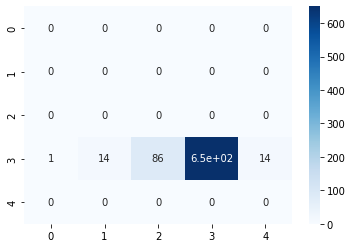

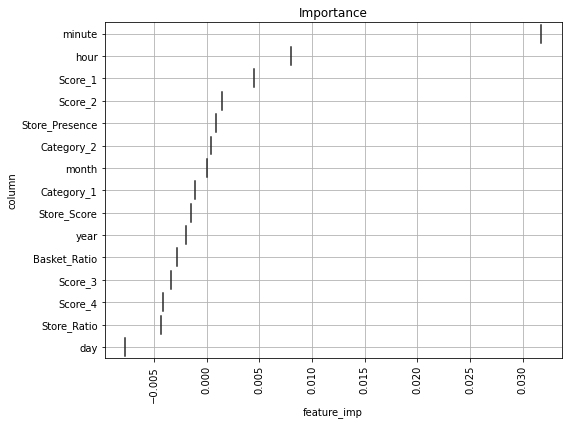

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
report_score(lr)

cm = confusion_matrix(y_predict,y_test)
print(cm)
# ploting heatmap for a confusion :
sns.heatmap(cm,annot=True,cmap="Blues")

# important features visualization:
fig,ax = feature_imp(lr.coef_[0],X)

# Random Forest Classifer

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00        14
           3       0.58      0.08      0.14        86
           4       0.86      0.99      0.92       650
           5       0.00      0.00      0.00        14

    accuracy                           0.85       765
   macro avg       0.49      0.41      0.41       765
weighted avg       0.80      0.85      0.80       765

[[  1   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   7   5   0]
 [  0  14  79 645  14]
 [  0   0   0   0   0]]


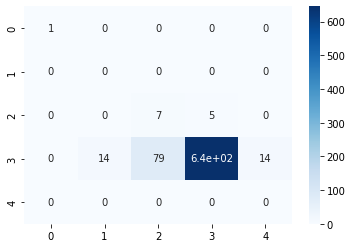

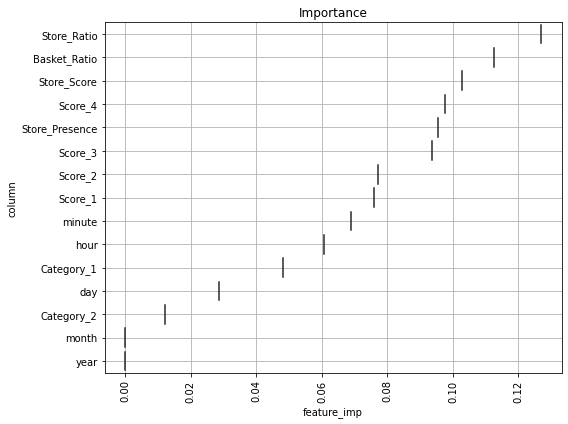

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# fitting the training values in model
rfc.fit(X_train,y_train)
# prediction
y_predict = rfc.predict(X_test)
report_score(rfc)

cm = confusion_matrix(y_predict,y_test)
print(cm)
# ploting heatmap for a confusion :
sns.heatmap(cm,annot=True,cmap="Blues")
# important Feature visualization
fig,ax = feature_imp(rfc.feature_importances_,X)

# ADA BOOST CLASSIFIER

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.01      0.43      0.03        14
           3       0.32      0.21      0.25        86
           4       0.75      0.31      0.43       650
           5       0.00      0.00      0.00        14

    accuracy                           0.29       765
   macro avg       0.42      0.39      0.34       765
weighted avg       0.68      0.29      0.40       765

[[  1   0   0   0   0]
 [  0   6  16 416   5]
 [  0   2  18  35   1]
 [  0   6  52 199   8]
 [  0   0   0   0   0]]


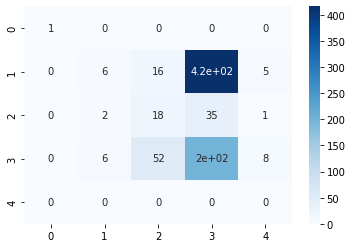

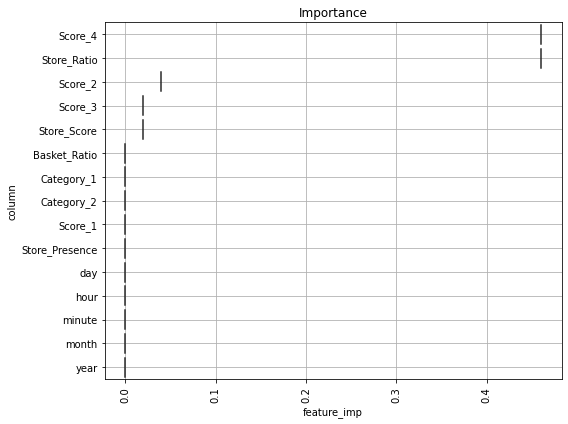

In [83]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
# prediction
y_predict = abc.predict(X_test)
report_score(abc)

cm = confusion_matrix(y_predict,y_test)
print(cm)
# ploting heatmap for a confusion :
sns.heatmap(cm,annot=True,cmap="Blues")
# important Feature visualization
fig,ax = feature_imp(abc.feature_importances_,X)

# SUPORT VECTOR CLASSIFIER


Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        86
           4       0.85      1.00      0.92       650
           5       0.00      0.00      0.00        14

    accuracy                           0.85       765
   macro avg       0.17      0.20      0.18       765
weighted avg       0.72      0.85      0.78       765

[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  1  14  86 650  14]
 [  0   0   0   0   0]]


<AxesSubplot:>

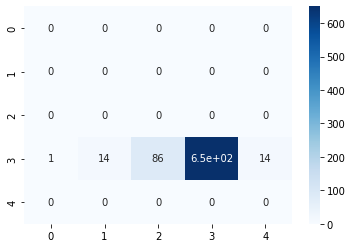

In [85]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
# prediction
y_predict = svm.predict(X_test)
report_score(svm)

cm = confusion_matrix(y_predict,y_test)
print(cm)
# ploting heatmap for a confusion :
sns.heatmap(cm,annot=True,cmap="Blues")
# important Feature visualization


# Decision Tree Classification

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00        14
           3       0.30      0.33      0.31        86
           4       0.88      0.86      0.87       650
           5       0.00      0.00      0.00        14

    accuracy                           0.77       765
   macro avg       0.44      0.44      0.44       765
weighted avg       0.79      0.77      0.78       765

[[  1   0   0   0   0]
 [  0   0   4  11   0]
 [  0   1  28  63   2]
 [  0  13  49 560  12]
 [  0   0   5  16   0]]


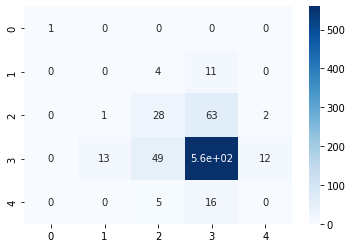

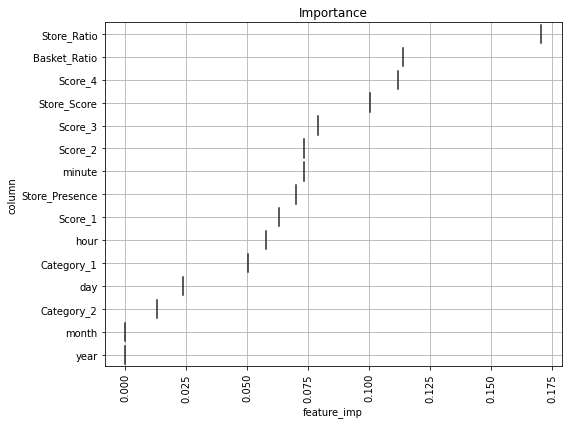

In [86]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
# prediction
y_predict = tree.predict(X_test)
report_score(tree)

cm = confusion_matrix(y_predict,y_test)
print(cm)
# ploting heatmap for a confusion :
sns.heatmap(cm,annot=True,cmap="Blues")
# important Feature visualization
fig,ax = feature_imp(tree.feature_importances_,X)

# KNN

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        14
           3       0.39      0.10      0.17        86
           4       0.86      0.98      0.91       650
           5       0.00      0.00      0.00        14

    accuracy                           0.84       765
   macro avg       0.25      0.22      0.22       765
weighted avg       0.77      0.84      0.80       765

[[  0   0   0   0   0]
 [  0   0   0   1   0]
 [  0   0   9  13   1]
 [  1  14  77 636  13]
 [  0   0   0   0   0]]
CPU times: user 347 ms, sys: 164 ms, total: 511 ms
Wall time: 271 ms


<AxesSubplot:>

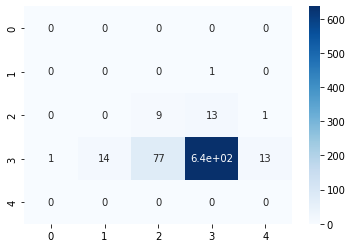

In [89]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
# prediction
y_predict = knn.predict(X_test)
report_score(knn)

cm = confusion_matrix(y_predict,y_test)
print(cm)
# ploting heatmap for a confusion :
sns.heatmap(cm,annot=True,cmap="Blues")
# important Feature visualization
#fig,ax = feature_imp(knn.feature_importances_,X)

# Gradient Boosting Classifier

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00        14
           3       0.56      0.06      0.11        86
           4       0.86      0.99      0.92       650
           5       0.00      0.00      0.00        14

    accuracy                           0.85       765
   macro avg       0.48      0.41      0.41       765
weighted avg       0.79      0.85      0.79       765

[[  1   0   0   0   0]
 [  0   0   0   1   0]
 [  0   0   5   4   0]
 [  0  14  79 645  14]
 [  0   0   2   0   0]]
CPU times: user 21.4 s, sys: 254 ms, total: 21.7 s
Wall time: 21.3 s


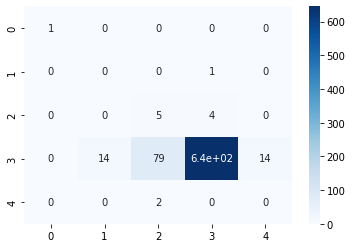

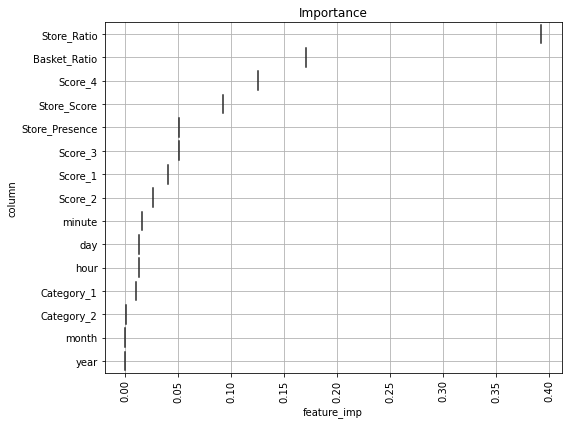

In [91]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
# prediction
y_predict = gbc.predict(X_test)
report_score(gbc)

cm = confusion_matrix(y_predict,y_test)
print(cm)
# ploting heatmap for a confusion :
sns.heatmap(cm,annot=True,cmap="Blues")
# important Feature visualization
fig,ax = feature_imp(gbc.feature_importances_,X)

# Bagging Classifier

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00        14
           3       0.26      0.19      0.22        86
           4       0.87      0.93      0.90       650
           5       0.33      0.07      0.12        14

    accuracy                           0.82       765
   macro avg       0.49      0.44      0.45       765
weighted avg       0.77      0.82      0.79       765

[[  1   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0  16  44   1]
 [  0  14  68 606  12]
 [  0   0   2   0   1]]
CPU times: user 1.72 s, sys: 145 ms, total: 1.86 s
Wall time: 1.62 s


<AxesSubplot:>

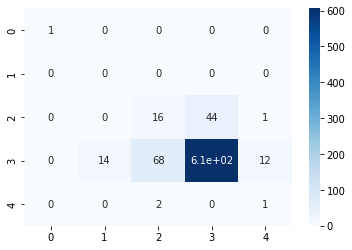

In [93]:
%%time
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(X_train,y_train)
# prediction
y_predict = bc.predict(X_test)
report_score(bc)

cm = confusion_matrix(y_predict,y_test)
print(cm)
# ploting heatmap for a confusion :
sns.heatmap(cm,annot=True,cmap="Blues")
# important Feature visualization
#fig,ax = feature_imp(bc.feature_importances_,X)

# Voting Classifier:

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00        14
           3       0.53      0.09      0.16        86
           4       0.86      0.99      0.92       650
           5       0.00      0.00      0.00        14

    accuracy                           0.85       765
   macro avg       0.48      0.42      0.42       765
weighted avg       0.79      0.85      0.80       765

[[  1   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   8   6   1]
 [  0  14  78 644  13]
 [  0   0   0   0   0]]
CPU times: user 8.22 s, sys: 250 ms, total: 8.47 s
Wall time: 8.23 s


<AxesSubplot:>

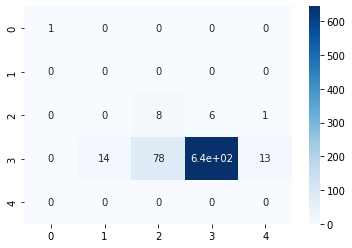

In [97]:
%%time
from sklearn.ensemble import VotingClassifier

classifier_lst = [('knn',knn),('svc',svm),('dt',tree),('rf',rfc)]
vot = VotingClassifier(estimators=classifier_lst,voting='hard')
vot.fit(X_train,y_train)
# prediction
y_predict = vot.predict(X_test)
report_score(vot)

cm = confusion_matrix(y_predict,y_test)
print(cm)
# ploting heatmap for a confusion :
sns.heatmap(cm,annot=True,cmap="Blues")
# important Feature visualization
#fig,ax = feature_imp(vot.feature_importances_,X)

# EASY ENSEMBLE CLASSIFIER

In [115]:
%%time
from imblearn.ensemble import EasyEnsembleClassifier
# Instantiate the model
easy_clf = EasyEnsembleClassifier()
# fitting the model on train data
easy_clf.fit(X_train,y_train)
# print score of the model
report_score(easy_clf)

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.04      0.43      0.08        14
           3       0.22      0.33      0.26        86
           4       0.96      0.49      0.65       650
           5       0.03      0.29      0.05        14

    accuracy                           0.47       765
   macro avg       0.45      0.51      0.41       765
weighted avg       0.84      0.47      0.58       765

CPU times: user 939 ms, sys: 14.1 ms, total: 953 ms
Wall time: 952 ms


# comparaing all model using metics:


In [116]:
def comparing_models_matric(model_list,name_list,X_train,y_train,X_test,y_test):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split
    
    for(model,name) in zip(model_list,name_list):
        print(f'Model Name: => [** {name} **]')
        # predicting on the test set
        y_pred_test = model.predict(X_test)
        report = classification_report(y_test,y_pred_test)
        print(f'Classification Report: {report}','\n','***'*14,'\n')

In [117]:
# list of model objects
model_list = [rfc,abc,svm,tree,knn,gbc,bc,vot,easy_clf]
# list of model names
name_list = ['RF','Ada','SVC','DT','KNN','GBR','Bagging','Voting','Easy']

# printing comparison of models
comparing_models_matric(model_list,name_list,X_train,y_train,X_test,y_test)

Model Name: => [** RF **]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00        14
           3       0.58      0.08      0.14        86
           4       0.86      0.99      0.92       650
           5       0.00      0.00      0.00        14

    accuracy                           0.85       765
   macro avg       0.49      0.41      0.41       765
weighted avg       0.80      0.85      0.80       765
 
 ****************************************** 

Model Name: => [** Ada **]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.01      0.43      0.03        14
           3       0.32      0.21      0.25        86
           4       0.75      0.31      0.43       650
           5       0.00      0.00      0.00        14

    accuracy                           

# HyperTunning Using GridSearchCV

In [123]:
# Helper function for gridSearchCv
def gridCV(model ,grid):
    from sklearn.model_selection import GridSearchCV,train_test_split,KFold
    cv = KFold(n_splits=5,shuffle=False,random_state=None)
    clf = GridSearchCV(model,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
    #fit model_cv
    clf.fit(X_train,y_train)
    # print best parameters
    print(clf.best_params_)
    # print best score
    print(clf.score(X_train,y_train))
    

In [124]:
# random forest Classifier
rf_param_grid = {'n_estimators':[800],
             'max_depth':[5],
             'min_samples_split':[2],
             'min_samples_leaf':[1]}

# passing data for hyper parameter tunning with Gridsearchcv
gridCV(rfc,rf_param_grid)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
0.3827236305088554


In [125]:
# create KNNRegressor parameters dict in list for tunning
knn_param_grid = {'leaf_size':list(range(1,3)),
                 'n_neighbors':list(range(1,3)),
                 'p':[1,2]}

# passing data for hyper parameter tunning with Gridsearchcv
gridCV(knn,knn_param_grid)


{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
1.0


In [126]:
# create GradientBoostRegressor parameters dict in list for tunning
gb_param_grid = {'n_estimators':[x for x in range(2,5,1)],
             'learning_rate':[0.1],
             'min_samples_split':[x for x in range(2,4)],
             'max_depth':[x for x in range(5,7)]}

# passing data for hyper parameter tunning with Gridsearchcv
gridCV(gbc,gb_param_grid)

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 4}
0.4457858421128763


In [127]:
# create DecisionTreeRegressor parameters dict in list for tunning

dt_param_grid = {'splitter':['best'],
                'max_depth':[1],
                'min_samples_leaf':[1],
                'min_weight_fraction_leaf':[0.1],
                'max_features':['auto'],
                'max_leaf_nodes':[None]}

# passing data for hyper parameter tunning with Gridsearchcv
gridCV(tree,dt_param_grid)


{'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
0.18263473053892215


In [128]:
# create AdaBoostRegressor parameters dict in list for tunning
ad_param_grid = {'n_estimators':[10,50],
                'learning_rate':[0.001]}

# passing data for hyper parameter tunning with Gridsearchcv
gridCV(abc,ad_param_grid)

{'learning_rate': 0.001, 'n_estimators': 10}
0.18263473053892215


# test Dataset

In [129]:
test.head()

Store_Ratio  Basket_Ratio  Category_1  Store_Score  Category_2  \
0        0.164         0.994           1      -23.718           0   
1        0.586         0.636           4       -7.710           1   
2        0.457         0.743           0       -7.591           1   
3        0.423         0.748           5       -9.832           1   
4        0.802         0.756           2      -10.791           0   

   Store_Presence  Score_1  Score_2  Score_3  Score_4    time  
0         0.12400  0.99100   0.7890  0.00001  127.602  236436  
1         0.00208  0.32200   0.1070  0.35500  136.337  253631  
2         0.40400  0.00931   0.2010  0.68800  154.902  215669  
3         0.03000  0.22100   0.1690  0.42800   93.977  325200  
4         0.08430  0.00765   0.0521  0.96300  131.715  288293

In [130]:
# preparing test data as similarly as done for train data before
test['minute'] = pd.to_datetime(test['time'].astype(int),unit='s').dt.minute
test['hour'] = pd.to_datetime(test['time'].astype(int),unit='s').dt.hour
test['day'] = pd.to_datetime(test['time'].astype(int),unit='s').dt.day
test['month'] = pd.to_datetime(test['time'].astype(int),unit='s').dt.month
test['year'] = pd.to_datetime(test['time'].astype(int),unit='s').dt.year

test = test.drop(['time'],axis=1)

In [132]:
col_to_scale = ['Store_Ratio','Basket_Ratio','Category_1','Store_Score','Category_2','Store_Presence','Score_1','Score_2','Score_3','Score_4']

# passing data and column name for scaling
Xtest = min_max_scaling(test,col_to_scale)


In [134]:
y_pred = vot.predict(Xtest)
y_pred

array([3, 4, 4, ..., 4, 4, 4])

In [135]:
predictions = pd.DataFrame(y_pred)

In [136]:
predictions

0
0      3
1      4
2      4
3      4
4      4
...   ..
10691  4
10692  4
10693  4
10694  4
10695  4

[10696 rows x 1 columns]